In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

In [6]:
data_location = "../Data/properati.csv"
data = pd.read_csv(data_location, sep=",")

In [7]:
data.info() #miramos los Dtypes y nulos del datafram

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [8]:
(data.isnull().sum() * 100 / len(data)).round(2)#Vemos el % de nulos en cada columna.

Unnamed: 0                     0.00
operation                      0.00
property_type                  0.00
place_name                     0.02
place_with_parent_names        0.00
country_name                   0.00
state_name                     0.00
geonames_id                   15.44
lat-lon                       42.53
lat                           42.53
lon                           42.53
price                         16.84
currency                      16.84
price_aprox_local_currency    16.84
price_aprox_usd               16.84
surface_total_in_m2           32.44
surface_covered_in_m2         16.42
price_usd_per_m2              43.39
price_per_m2                  27.69
floor                         93.48
rooms                         60.91
expenses                      88.23
properati_url                  0.00
description                    0.00
title                          0.00
image_thumbnail                2.57
dtype: float64

In [151]:
#Definimos nuestro dataframe a analizar de la comuna 13, agurpamos por place_name y concatenamos los 3 barrios.
data_grupo = data.groupby('place_name')
data_belgrano = data_grupo.get_group('Belgrano')
data_colegiales = data_grupo.get_group('Colegiales')
data_nuñez = data_grupo.get_group('Nuñez')
comuna_13 = [data_belgrano, data_colegiales, data_nuñez]
data_comuna = pd.concat(comuna_13, axis=0)
data_comuna.head(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
57,57,sell,store,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5639725,-58.456535",-34.563972,-58.456535,250000.0,USD,4411125.0,250000.0,30.0,30.0,8333.333333,8333.333333,NaN,NaN,NaN,http://www.properati.com.ar/15bv5_venta_local_...,VENTA DE LOCAL SOBRE VÍA PÚBLICA CON RENTA - 3...,Local en Excelente Ubicación - Venta con Renta,https://thumbs4.properati.com/9/m1Sn4i7S8r5Mb-...
120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",-34.562697,-58.460157,178000.0,USD,3140721.0,178000.0,NaN,55.0,NaN,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"Depto de 3 amb. c/cochera cubierta, en piso 12...","Departamento con Plantas en Mendoza 2700, Capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...
210,210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",-34.562084,-58.456686,240000.0,USD,4234680.0,240000.0,57.0,54.0,4210.526316,4444.444444,NaN,2.0,NaN,http://www.properati.com.ar/15dic_venta_depart...,DUPLEX CON COCHERA FIJA CUBIERTA 3 AÑOS DE ANT...,2 Ambientes Venta Belgrano Cochera Cubierta,https://thumbs4.properati.com/4/5UHwVgdJWRAYH5...


In [10]:
data_comuna['property_type'].value_counts()

apartment    3727
house         192
PH            102
store         101
Name: property_type, dtype: int64

In [11]:
data_comuna = data_comuna.drop(data_comuna[data_comuna['property_type'] == 'store'].index)

In [12]:
data_comuna['property_type'].value_counts()

apartment    3727
house         192
PH            102
Name: property_type, dtype: int64

In [13]:
data_comuna.shape

(4021, 26)

In [14]:
data_superficie_fill = data_comuna.surface_total_in_m2.fillna(data_comuna["surface_covered_in_m2"])
#superficie_fill es la nueva columna con datos de superficie total rellenos con surface_covered
data_comuna["superficie_fill"] = data_superficie_fill  
data_superficie_fill.isnull().sum()

34

In [15]:
#busco esos 34 nulos y trato de completarlos con las columnas de texto libre:
sup_null_mask = data_superficie_fill.isnull() #creo la mascara
data_sup_null = data_comuna.loc[sup_null_mask, :] #la aplico a data_comuna y genero un df
#extraigo m2 :
sup_in_title = data_sup_null.title.str.extract(r"(\d{1,4}).?(?:M|m)2") 
sup_in_url = data_sup_null.properati_url.str.extract(r"(\d{1,4}).?(?:M|m)2")
sup_in_desc = data_sup_null.description.str.extract(r"(\d{1,4}).?(?:M|m)2")
sup_in_text = pd.concat([sup_in_title, sup_in_url, sup_in_desc], axis = 1) #pego columnas con las extracciones
sup_in_text = sup_in_text.fillna(0) #fillna con ceros#fillna con ceros
sup_in_text.columns = ['title', 'url', 'desc']#cambio nombres de columnas
#las convierto en floats
sup_in_text['title'] = sup_in_text['title'].astype(float)
sup_in_text['url'] = sup_in_text['url'].astype(float)
sup_in_text['desc'] = sup_in_text['desc'].astype(float)
sup_in_text['to_fill'] = sup_in_text.max(axis=1)#genero una nueva columna con los registros a llenar
mask_to_fill = sup_in_text['to_fill']>0 #creo mascara para quedarme solo con los registros a llenar
sup_to_fill = sup_in_text.loc[mask_to_fill, :] #creo el df para llenar
sup_to_fill

,title,url,desc,to_fill
14107,360.0,0.0,0.0,360.0
69681,0.0,0.0,49.0,49.0
119647,0.0,0.0,55.0,55.0
93493,0.0,0.0,380.0,380.0
8343,0.0,0.0,68.0,68.0


In [16]:
#los cargo 1x1:
data_comuna.loc[14107, "superficie_fill"] = 360
data_comuna.loc[69681, "superficie_fill"] = 49
data_comuna.loc[119647, "superficie_fill"] = 55
data_comuna.loc[93493, "superficie_fill"] = 380
data_comuna.loc[8343, "superficie_fill"] = 68

In [17]:
data_comuna["superficie_fill"].isnull().sum()#quedan 29 nulos

29

In [18]:
data_comuna["superficie_fill"].describe()#vemos que hay datos extremos que son errores (min y max)

count    3992.000000
mean      108.467936
std       147.938592
min         0.000000
25%        46.000000
50%        69.000000
75%       119.000000
max      5483.000000
Name: superficie_fill, dtype: float64

In [19]:
#busco valores extremos y los cuento:
data_comuna_sup_mask = (data_comuna["superficie_fill"] < 19) | (data_comuna["superficie_fill"] > 1600)
data_comuna_sup_mask.value_counts()
data_comuna.loc[data_comuna_sup_mask, :]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill
46473,46473,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,19800.000000,2200.000000,5.0,NaN,NaN,http://www.properati.com.ar/1965m_venta_depart...,Edificio ubicado en la calle Sucre entre Av. d...,"Departamento 10m² con 6 Plantas en Sucre, Mcal...",https://thumbs4.properati.com/5/seI4dc_mIz-trk...,10.0
51824,51824,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,31.369688,NaN,5.0,NaN,NaN,http://www.properati.com.ar/19hug_venta_depart...,"Muy Lindo departamento, muy Luminoso. Vista a ...","Departamento 5483m² con Cochera en Vidal 3300,...",https://thumbs4.properati.com/6/PQ026tq4TL_iin...,5483.0
63093,63093,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563051,-58.464303",-34.563051,...,NaN,26.076636,3.0,1.0,NaN,http://www.properati.com.ar/1a86p_venta_depart...,Corredor Responsable: Jorge Salafia - CUCICBA ...,Monoambiente con cocina americana en Belgrano R,https://thumbs4.properati.com/2/6DPwsEZmIjMosE...,2949.0
50356,50356,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5482229,-58.4558864",-34.548223,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e7c_venta_depart...,"Cerca del Rio , ubicado sobre Av del Libertado...",Torre Chateau Libertador . Espectaculares vist...,https://thumbs4.properati.com/5/4DBy1f7HU2qpNy...,0.0
106850,106850,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5542242,-58.4678339",-34.554224,...,15735.000000,2860.909091,NaN,NaN,NaN,http://www.properati.com.ar/1bwy5_venta_depart...,CODIGO: 2230-71 ubicado en: TAMBORINI 2700 - ...,GRAN OPORTUNIDAD A MTS DE AV CABILDO APTO CRED...,https://thumbs4.properati.com/3/LDKA4rVEhmLAf2...,10.0


In [20]:
#vemos que hay casos donde surface_covered_in_m2 > surface_total_in_m2 
(data_comuna['surface_covered_in_m2'] > data_comuna['superficie_fill']).value_counts()

False    4007
True       14
dtype: int64

In [21]:
# los damos vuelta:
data_comuna['superficie_fill'] = data_comuna[['superficie_fill', 'surface_covered_in_m2']].max(axis=1)

In [22]:
#verificamos
(data_comuna['surface_covered_in_m2'] > data_comuna['superficie_fill']).value_counts()

False    4021
dtype: int64

In [23]:
data_comuna["superficie_fill"].describe()#vemos que hay datos extremos que son errores (min y max)

count    3992.00000
mean      108.70992
std       148.01734
min         0.00000
25%        46.00000
50%        69.00000
75%       119.25000
max      5483.00000
Name: superficie_fill, dtype: float64

In [24]:
#vuelvo a buscar valores extremos y veo que quedan 3:
data_comuna_sup_mask = (data_comuna["superficie_fill"] < 19) | (data_comuna["superficie_fill"] > 1600)
data_comuna_sup_mask.value_counts()
data_comuna.loc[data_comuna_sup_mask, :]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill
51824,51824,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,31.369688,NaN,5.0,NaN,NaN,http://www.properati.com.ar/19hug_venta_depart...,"Muy Lindo departamento, muy Luminoso. Vista a ...","Departamento 5483m² con Cochera en Vidal 3300,...",https://thumbs4.properati.com/6/PQ026tq4TL_iin...,5483.0
63093,63093,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.563051,-58.464303",-34.563051,...,NaN,26.076636,3.0,1.0,NaN,http://www.properati.com.ar/1a86p_venta_depart...,Corredor Responsable: Jorge Salafia - CUCICBA ...,Monoambiente con cocina americana en Belgrano R,https://thumbs4.properati.com/2/6DPwsEZmIjMosE...,2949.0
50356,50356,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5482229,-58.4558864",-34.548223,...,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/19e7c_venta_depart...,"Cerca del Rio , ubicado sobre Av del Libertado...",Torre Chateau Libertador . Espectaculares vist...,https://thumbs4.properati.com/5/4DBy1f7HU2qpNy...,0.0


In [25]:
#son 3 departamentos, me fijo en description
print(data_comuna.loc[51824, 'description']) # dice 5483m2 pero por la descripcion es 54,83m2
print(data_comuna.loc[63093, 'description']) # dice 2949m2 pero por la descripcion es 29,48m2
print(data_comuna.loc[50356, 'description']) # dice 0 pero en la descripcion es 215m2

Muy Lindo departamento, muy Luminoso. Vista a contrafrente orientacion Este / NortePallier comun - Living/comedor con balcon - 2 dormitorios con placc - baÃ±o completo - cocina comedor- lavaderoEspacio guardacoche cubierto en Planta Baja
Corredor Responsable: Jorge Salafia - CUCICBA 5666Contacto: Karen Orille - MLS ID # 420211178-7Monoambiente ubicado en el barrio de Belgrano R, es interno y luminoso, con vista a la frente, ubicado en un tercer piso. Son 29,45mt2 por escritura. La cocina es integrada y baño con ducha. Los pisos son de parquet plastificado y tiene placard. Es APTO CREDITO (con planos y reglamento de copropiedad). El estado general es excelente. Ideal Inversores.  Las expensas son de $1800 aproximadas.  MEDIOS DE TRANSPORTE: Colectivos 19, 67, 76, 107, 113, 114, 133, 151, etc. Subte Linea D a 8 cuadras. FC Mitre Est. Belgrano R a 4 cuadras.   
Cerca del Rio , ubicado sobre Av del Libertador al 7000 en el barrio de Nuñez . Con una imponente torre de 40 pisos, Chateau Libe

In [26]:
#los imputo 1x1:
data_comuna.loc[51824, 'superficie_fill'] = 55
data_comuna.loc[63093, 'superficie_fill'] = 29
data_comuna.loc[50356, 'superficie_fill'] = 215

In [27]:
#verifico que no hay casos extremos:
data_comuna["superficie_fill"].describe()

count    3992.000000
mean      106.672595
std       112.466768
min        19.000000
25%        46.000000
50%        69.000000
75%       119.000000
max      1600.000000
Name: superficie_fill, dtype: float64

In [28]:
#veo cuantos nulos quedaron
data_comuna["superficie_fill"].isnull().sum()

29

In [29]:
#agrupo por tipo de propiedad y barrio para buscar la media de superficie y usarla para completar registros nulos
grupo_proptype = data_comuna.groupby(['place_name','property_type'])

In [30]:
grupo_proptype['superficie_fill'].mean().round(2)

place_name  property_type
Belgrano    PH               126.42
            apartment         94.81
            house            457.00
Colegiales  PH               134.42
            apartment         65.72
            house            268.36
Nuñez       PH               135.00
            apartment         88.43
            house            298.88
Name: superficie_fill, dtype: float64

In [31]:
#completo en cada superficie_fill con la media condicionada por barrio y tipo de propiedad:
data_comuna.loc[((data_comuna.place_name == 'Belgrano') & (data_comuna.property_type == 'PH') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 126.42
data_comuna.loc[((data_comuna.place_name == 'Belgrano') & (data_comuna.property_type == 'apartment') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 94.81
data_comuna.loc[((data_comuna.place_name == 'Belgrano') & (data_comuna.property_type == 'house') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 457

In [32]:
data_comuna.loc[((data_comuna.place_name == 'Colegiales') & (data_comuna.property_type == 'PH') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 134.42
data_comuna.loc[((data_comuna.place_name == 'Colegiales') & (data_comuna.property_type == 'apartment') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 65.72
data_comuna.loc[((data_comuna.place_name == 'Colegiales') & (data_comuna.property_type == 'house') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 268.36

In [33]:
data_comuna.loc[((data_comuna.place_name == 'Nuñez') & (data_comuna.property_type == 'PH') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 135
data_comuna.loc[((data_comuna.place_name == 'Nuñez') & (data_comuna.property_type == 'apartment') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 88.43
data_comuna.loc[((data_comuna.place_name == 'Nuñez') & (data_comuna.property_type == 'house') & (data_comuna.superficie_fill.isnull())) , 'superficie_fill'] = 298.88

In [34]:
#verifico que no hay mas nulos:
data_comuna["superficie_fill"].isnull().sum()

0

In [35]:
#esto es para que esconda columnas ni filas con el '...'
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 800)

In [36]:
#vemos las columnas de precios en USD y en $:
data_comuna.loc[:, ['price', 'currency', 'price_aprox_local_currency',\
                    'price_aprox_usd',  'price_usd_per_m2', 'price_per_m2']].head()


,price,currency,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2
7,138000.0,USD,2434941.0,138000.0,3066.666667,3450.000000
8,195000.0,USD,3440677.5,195000.0,3000.000000,3250.000000
120,178000.0,USD,3140721.0,178000.0,NaN,3236.363636
210,240000.0,USD,4234680.0,240000.0,4210.526316,4444.444444
216,550000.0,USD,9704475.0,550000.0,3437.500000,3666.666667


In [37]:
data_comuna.loc[:, ['price', 'currency', 'price_aprox_local_currency',\
                    'price_aprox_usd',  'price_usd_per_m2', 'price_per_m2']].describe().round()


,price,price_aprox_local_currency,price_aprox_usd,price_usd_per_m2,price_per_m2
count,3505.0,3505.0,3505.0,2872.0,3317.0
mean,624452.0,5792441.0,328286.0,3111.0,8036.0
std,2147398.0,7359551.0,417102.0,1184.0,28571.0
min,23000.0,108852.0,6169.0,31.0,26.0
25%,134000.0,2307018.0,130750.0,2514.0,2787.0
50%,204200.0,3493611.0,198000.0,2919.0,3281.0
75%,398000.0,6352020.0,360000.0,3400.0,3902.0
max,50000000.0,105867000.0,6000000.0,20833.0,692046.0


In [38]:
data_comuna.loc[:, ['price', 'currency', 'price_aprox_local_currency',\
                    'price_aprox_usd',  'price_usd_per_m2', 'price_per_m2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4021 entries, 7 to 120985
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       3505 non-null   float64
 1   currency                    3505 non-null   object 
 2   price_aprox_local_currency  3505 non-null   float64
 3   price_aprox_usd             3505 non-null   float64
 4   price_usd_per_m2            2872 non-null   float64
 5   price_per_m2                3317 non-null   float64
dtypes: float64(5), object(1)
memory usage: 379.9+ KB


In [39]:
#price, price_aprox_local_currency y price_aprox_usd tienen los mismos registros
#usamos price_aprox_usd para nuestro análisisde precio por m2, primero vemos los nulos
data_comuna['price_aprox_usd'].isnull().sum()

516

In [40]:
#busco completar datos con  price_usd_per_m2 pero no hay nada
mask_precio_null =  data_comuna['price_aprox_usd'].isnull()
data_comuna.loc[mask_precio_null, 'price_usd_per_m2'].notnull().sum()

0

In [41]:
##COMPLETAR NULOS CON OTRA COSA, lo hacemos mas adelante

In [42]:
#creamos columna precio_m2 y vemos valores nulos:
data_comuna['precio_m2'] = data_comuna['price_aprox_usd'] / data_comuna['superficie_fill']
data_comuna['precio_m2'].isnull().sum()

516

In [43]:
#ahora vemos valores extremos
data_comuna['precio_m2'].describe().round()

count     3505.0
mean      3097.0
std       1234.0
min        131.0
25%       2500.0
50%       2916.0
75%       3396.0
max      23450.0
Name: precio_m2, dtype: float64

In [44]:
#buscamos los casos de precio_m2<1000
data_comuna[data_comuna['precio_m2']<1000].shape

(16, 28)

In [45]:
data_comuna[data_comuna['precio_m2']<1000].head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,precio_m2
22580,22580,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5812079,-58.4428209",-34.581208,-58.442821,240000.0,ARS,237496.38,13460.08,62.0,58.0,217.098065,4137.931034,NaN,2.0,NaN,http://www.properati.com.ar/17j85_venta_depart...,Venta 2 AMBIENTES en Palermo Hermoso 2 amb a e...,Venta 2 AMBIENTES - PALERMO - DORREGO 1700,https://thumbs4.properati.com/8/_qndRfHDugrjbW...,62.00,217.098065
24907,24907,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5528199,-58.4528222",-34.552820,-58.452822,79900.0,USD,1409795.55,79900.00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/17p9q_venta_depart...,MUY BUEN DEPARTAMENTO DE 1 AMBIENTE !!! EN EDI...,BELGRANO 1 AMBIENTE A ESTRENAR,https://thumbs4.properati.com/4/f55ch2wjaSgmw9...,94.81,842.738108
30988,30988,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.562317,-58.45963",-34.562317,-58.459630,82000.0,USD,1446849.00,82000.00,NaN,NaN,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/18373_venta_depart...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Belgrano,https://thumbs4.properati.com/9/yjx5_D9ICSPRBK...,94.81,864.887670
109317,109317,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",-34.558458,-58.459929,61500.0,USD,1085136.75,61500.00,82.0,69.0,750.000000,891.304348,NaN,NaN,NaN,http://www.properati.com.ar/1c20t_venta_depart...,Venta desde Pozo!! Comienzo de obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/7/9DCw_ZWNGZSUgp...,82.00,750.000000
109370,109370,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",-34.558458,-58.459929,38250.0,USD,674902.12,38250.00,51.0,48.0,750.000000,796.875000,NaN,NaN,NaN,http://www.properati.com.ar/1c22r_venta_depart...,Venta desde Pozo!! Comienzo de Obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/8/ISfuzmE_Hq1rln...,51.00,750.000000


In [46]:
#vemos que hay precios en dolares que figuran como ARS , al convertir da muy bajo, correjimos:
mask_error_ARS = (data_comuna['precio_m2'] < 1000) & (data_comuna['currency'] =='ARS')
data_comuna.loc[mask_error_ARS,'price_aprox_usd'] = data_comuna['price']

In [47]:
#redefino precio_m2 para que acualice los cambios:
data_comuna['precio_m2'] = data_comuna['price_aprox_usd'] / data_comuna['superficie_fill']

In [48]:
#siguen habiendo 10 casos, los vemos 
data_comuna[data_comuna['precio_m2']<1000].shape

(10, 28)

In [49]:
data_comuna[data_comuna['precio_m2']<1000]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,precio_m2
24907,24907,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5528199,-58.4528222",-34.552820,-58.452822,79900.0,USD,1409795.55,79900.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/17p9q_venta_depart...,MUY BUEN DEPARTAMENTO DE 1 AMBIENTE !!! EN EDI...,BELGRANO 1 AMBIENTE A ESTRENAR,https://thumbs4.properati.com/4/f55ch2wjaSgmw9...,94.81,842.738108
30988,30988,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.562317,-58.45963",-34.562317,-58.459630,82000.0,USD,1446849.00,82000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,http://www.properati.com.ar/18373_venta_depart...,"Venta - Departamento - Argentina, Buenos Aires...",Departamento en Venta ubicado en Belgrano,https://thumbs4.properati.com/9/yjx5_D9ICSPRBK...,94.81,864.887670
109317,109317,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",-34.558458,-58.459929,61500.0,USD,1085136.75,61500.0,82.0,69.0,750.000000,891.304348,NaN,NaN,NaN,http://www.properati.com.ar/1c20t_venta_depart...,Venta desde Pozo!! Comienzo de obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/7/9DCw_ZWNGZSUgp...,82.00,750.000000
109370,109370,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",-34.558458,-58.459929,38250.0,USD,674902.12,38250.0,51.0,48.0,750.000000,796.875000,NaN,NaN,NaN,http://www.properati.com.ar/1c22r_venta_depart...,Venta desde Pozo!! Comienzo de Obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/8/ISfuzmE_Hq1rln...,51.00,750.000000
109375,109375,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",-34.558458,-58.459929,40500.0,USD,714602.25,40500.0,54.0,50.0,750.000000,810.000000,NaN,NaN,NaN,http://www.properati.com.ar/1c22w_venta_depart...,Venta desde Pozo!! Comienzo de Obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/6/uymHdYSucYF1LX...,54.00,750.000000
112269,112269,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5584575532,-58.4599286456",-34.558458,-58.459929,29250.0,USD,516101.62,29250.0,39.0,37.0,750.000000,790.540541,NaN,NaN,NaN,http://www.properati.com.ar/1c6qb_venta_depart...,Venta desde Pozo!! Comienzo de Obra Noviembre...,Departamento - Belgrano,https://thumbs4.properati.com/6/OebWvgHxvz9_GU...,39.00,750.000000
41909,41909,sell,house,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,3435356.0,"-34.6108387,-58.5005758",-34.610839,-58.500576,60000.0,USD,1058670.00,60000.0,120.0,92.0,500.000000,652.173913,NaN,4.0,NaN,http://www.properati.com.ar/18vba_venta_casa_c...,Villa Rosas - Excelente sector - Casa 2 dorm c...,VILLA ROSAS - ENTREGA + FINANC. 12 MESES - IMP...,https://thumbs4.properati.com/6/LnAuPzwsCIIa71...,120.00,500.000000
80920,80920,sell,apartment,Colegiales,|Argentina|Capital Federal|Colegiales|,Argentina,Capital Federal,3435356.0,"-34.5797947302,-58.4534741139",-34.579795,-58.453474,30000.0,USD,529335.00,30000.0,47.0,33.0,638.297872,909.090909,NaN,NaN,NaN,http://www.properati.com.ar/1axe5_venta_depart...,Transnferencia de Adhesion a Fideicomiso. El c...,Departamento en Colegiales,https://thumbs4.properati.com/2/XMS3iOkwmiM1j9...,47.00,638.297872
17345,17345,sell,apartment,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.5362412,-58.4680035",-34.536241,-58.468004,23000.0,USD,405823.50,23000.0,92.0,92.0,250.000000,250.00000

In [50]:
#son casos para dropear: 2 mal place_name,1 fideicomiso, 1 habitado, 6 en pozo)
#depto en pozo, fideicomiso, habitados)

In [51]:
#los selecciono y verifico que son los mismos:
index_m2_bajo_drop = data_comuna[ data_comuna['precio_m2']<1000].index
index_m2_bajo_drop

Int64Index([24907, 30988, 109317, 109370, 109375, 112269, 41909, 80920, 17345,
            46548],
           dtype='int64')

In [52]:
#dropeo:
data_comuna.drop(index_m2_bajo_drop , inplace=True)

In [53]:
#chequeo que no hay mas:
data_comuna[data_comuna['precio_m2']<1000].shape

(0, 28)

In [54]:
#vuelvo a mirar los valores de precio_m2 
data_comuna['precio_m2'].describe()

count     3495.000000
mean      3111.105419
std       1226.184367
min       1000.000000
25%       2503.164557
50%       2920.000000
75%       3401.769345
max      23450.000000
Name: precio_m2, dtype: float64

In [55]:
#Ahora buscamos los casos de precio_m2<15000
data_comuna[data_comuna['precio_m2']>15000].shape

(5, 28)

In [56]:
data_comuna[data_comuna['precio_m2']>15000].sort_values('precio_m2')

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,precio_m2
34703,34703,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.568461,-58.473233",-34.568461,-58.473233,320000.0,USD,5646240.0,320000.0,NaN,20.0,NaN,16000.0,NaN,5.0,NaN,http://www.properati.com.ar/18cmx_venta_ph_vil...,Corredor Responsable: Gustavo Guastello - C.U....,PH EN VENTA BELGRANO R 5 AMBIENTES FTE. APTO P...,https://thumbs4.properati.com/7/HTsKesOSXvTOzL...,20.0,16000.0
109767,109767,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.56498,-58.452088",-34.564980,-58.452088,399000.0,USD,7040155.5,399000.0,NaN,20.0,NaN,19950.0,NaN,6.0,NaN,http://www.properati.com.ar/1c2n3_venta_ph_bel...,Corredor Responsable: Win Bienes Raices SRL - ...,PH 4/5 amb. C/PATIO-Quincho GRAN UBICAC. Bjas exp,https://thumbs4.properati.com/8/OSvvSMINs3ZhY-...,20.0,19950.0
10305,10305,sell,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.567449,-58.461868",-34.567449,-58.461868,420000.0,USD,7410690.0,420000.0,NaN,20.0,NaN,21000.0,NaN,5.0,NaN,http://www.properati.com.ar/1672w_venta_ph_bel...,Corredor Responsable: Gustavo Guastello - C.U....,"PH Casa Belgrano R, 5 amb +.",https://thumbs4.properati.com/3/JvSDyLc-DdfXcM...,20.0,21000.0
45595,45595,sell,house,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.567017,-58.453898",-34.567017,-58.453898,460000.0,USD,8116470.0,460000.0,NaN,20.0,NaN,23000.0,NaN,4.0,NaN,http://www.properati.com.ar/194gx_venta_casa_b...,Corredor Responsable: Gustavo Guastello - C.U....,CASA BELGRANO,https://thumbs4.properati.com/3/x9O4sHUT0tXROl...,20.0,23000.0
63098,63098,sell,house,Nuñez,|Argentina|Capital Federal|Nuñez|,Argentina,Capital Federal,3430348.0,"-34.546651259,-58.4592113562",-34.546651,-58.459211,469000.0,USD,8275270.5,469000.0,NaN,20.0,NaN,23450.0,NaN,4.0,NaN,http://www.properati.com.ar/1a871_venta_casa_n...,Corredor Responsable: Gustavo Guastello - C.U....,"VENTA DE CASA EN NÚÑEZ, 4 AMBIENTES",https://thumbs4.properati.com/8/0nJE0-4eMDDANW...,20.0,23450.0


In [57]:
# son 5 propiedades que figuran con 20m2 de superficie, buscamos en los campos de texto libre si lo podemos completar

data_pm2_alto = data_comuna[data_comuna['precio_m2']>15000].sort_values('precio_m2')

In [58]:
sup_desc_pm2_bajo = data_pm2_alto.description.str.extract(r"(\d{1,4}).?(?:M|m)2")
sup_desc_pm2_bajo

,0
34703,NaN
109767,138
10305,NaN
45595,60
63098,NaN


In [59]:
#imputo los que extraje
data_comuna.loc[109767, 'superficie_fill'] = 138
data_comuna.loc[45595, 'superficie_fill'] = 60

In [60]:
#Pasamos a minuscula la columna description, title y properati_url para extraer mas facil palabras clave
data_comuna["description"] = data_comuna["description"].str.lower()
data_comuna["title"] = data_comuna["title"].str.lower()
data_comuna["properati_url"] = data_comuna["properati_url"].str.lower()

In [61]:
#extraemos de estas columnas las palabras clave y creamos una columna con True/False para cada una:
pattern = r"terraza"
data_comuna["Terraza"] = data_comuna["description"].str.contains(pattern) | data_comuna["properati_url"].str.contains(pattern) | data_comuna["title"].str.contains(pattern)

pattern2 = r"subte"
data_comuna["Subte"] = data_comuna["description"].str.contains(pattern2) | data_comuna["properati_url"].str.contains(pattern2) | data_comuna["title"].str.contains(pattern2)

pattern3 = r"parrilla"
data_comuna["Parrilla"] = data_comuna["description"].str.contains(pattern3) | data_comuna["properati_url"].str.contains(pattern3) | data_comuna["title"].str.contains(pattern3)

pattern4 = r"(pileta|piscina)"
data_comuna["Pileta"] = data_comuna["description"].str.contains(pattern4) | data_comuna["properati_url"].str.contains(pattern4) | data_comuna["title"].str.contains(pattern4)

pattern5 = r"(balcon|balcón)"
data_comuna["Balcon"] = data_comuna["description"].str.contains(pattern5) | data_comuna["properati_url"].str.contains(pattern5) | data_comuna["title"].str.contains(pattern5)

pattern6 = r"(cochera|garage|guardacoche)"
data_comuna["Cochera"] = data_comuna["description"].str.contains(pattern6) | data_comuna["properati_url"].str.contains(pattern6) | data_comuna["title"].str.contains(pattern6)

pattern10 = r"baulera"
data_comuna["Baulera"] = data_comuna["description"].str.contains(pattern10) | data_comuna["properati_url"].str.contains(pattern10) | data_comuna["title"].str.contains(pattern10)

pattern11 = r"(jardin|jardín)"
data_comuna["Jardin"] = data_comuna["description"].str.contains(pattern11) | data_comuna["properati_url"].str.contains(pattern11) | data_comuna["title"].str.contains(pattern11)

pattern12 = r"(lavadero|laundry)"
data_comuna["Lavadero"] = data_comuna["description"].str.contains(pattern12) | data_comuna["properati_url"].str.contains(pattern12) | data_comuna["title"].str.contains(pattern12)

pattern14 = r"(luminoso|lleno\s*de\s*luz)"
data_comuna["Luminoso"] = data_comuna["description"].str.contains(pattern14) | data_comuna["properati_url"].str.contains(pattern14) | data_comuna["title"].str.contains(pattern14)
#extraemos rooms de las columnas description, title y properati_url

pattern15 = r"patio"
data_comuna["Patio"] = data_comuna["description"].str.contains(pattern15) | data_comuna["properati_url"].str.contains(pattern15) | data_comuna["title"].str.contains(pattern15)

pattern16 = r"(gym|gimnasio)"
data_comuna["Gimnasio"] = data_comuna["description"].str.contains(pattern16) | data_comuna["properati_url"].str.contains(pattern16) | data_comuna["title"].str.contains(pattern16)




pattern7 = r"(\d)\s*dormitorio|habitacion"
pattern9 = r"(\d).?ambientes" #este es para _ Para usar con properati_url

data_comuna["Habitaciones"] = data_comuna["description"].str.extract(pattern7).fillna(data_comuna["title"].str.extract(pattern7).fillna(data_comuna["properati_url"].str.extract(pattern9))) #extraes cantidad de dormitorios de title y description
data_comuna["Habitaciones"] = data_comuna["Habitaciones"].str.extract(r"(\d)") #extraigo solo el numero sin la palabra dormitorios para que no sea un st y poder sumarle + 1

data_comuna["Habitaciones"] = pd.to_numeric(data_comuna["Habitaciones"], downcast='float') #como era object la columna, la paso a float

pattern8 = r"(\d)\s*ambientes"  #extraes x ambientes de columnas
data_comuna["Ambientes"] = data_comuna["description"].str.extract(pattern8).fillna(data_comuna["title"].str.extract(pattern8))
data_comuna["Ambientes"] = data_comuna["Ambientes"].str.extract(r"(\d)") #reducis a un numero

data_comuna["Ambientes"] = pd.to_numeric(data_comuna["Ambientes"], downcast='float') #pasas a float la columna
masuno = (data_comuna["Habitaciones"] + 1)
data_comuna["Ambientes"] = data_comuna.Ambientes.fillna(masuno) #a los datos de habitacion le sumas uno y rellenas con esa data que no te relleno el pattern de ambientes

data_comuna["Ambientes"] = data_comuna.Ambientes.fillna(data_comuna["rooms"]) #rellenas ambientes con rooms
data_comuna.head(10)

C:\Anaconda\envs\dhdsblend\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,precio_m2,Terraza,Subte,Parrilla,Pileta,Balcon,Cochera,Baulera,Jardin,Lavadero,Luminoso,Patio,Gimnasio,Habitaciones,Ambientes
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.00,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,excelente monoambiente a estrenar amplio super...,jose hernandez 1400 monoambiente estrenar cat...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,45.0,3066.666667,False,False,False,True,False,False,False,False,True,True,False,False,NaN,NaN
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.50,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,excelente dos ambientes estrenar amplio super...,"jose hernandez 1400 dos ambientes estrenar ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,65.0,3000.000000,False,False,False,True,False,False,False,False,True,True,False,False,NaN,NaN
120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",-34.562697,-58.460157,178000.0,USD,3140721.00,178000.0,NaN,55.0,NaN,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"depto de 3 amb. c/cochera cubierta, en piso 12...","departamento con plantas en mendoza 2700, capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...,55.0,3236.363636,False,True,False,False,True,True,False,False,True,True,False,False,NaN,NaN
210,210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",-34.562084,-58.456686,240000.0,USD,4234680.00,240000.0,57.0,54.0,4210.526316,4444.444444,NaN,2.0,NaN,http://www.properati.com.ar/15dic_venta_depart...,duplex con cochera fija cubierta 3 años de ant...,2 ambientes venta belgrano cochera cubierta,https://thumbs4.properati.com/4/5UHwVgdJWRAYH5...,57.0,4210.526316,True,True,True,False,True,True,False,False,False,True,False,False,1.0,2.0
216,216,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5621457,-58.449657",-34.562146,-58.449657,550000.0,USD,9704475.00,550000.0,160.0,150.0,3437.500000,3666.666667,NaN,4.0,NaN,http://www.properati.com.ar/15diu_venta_depart...,"piso de categoría en barrancas del belgrano, e...",piso barrancas de belgrano venta 2 cocheras fi...,https://thumbs4.properati.com/3/83eGl5QZS6Glfm...,160.0,3437.500000,False,True,False,False,False,True,True,False,True,True,False,False,3.0,4.0
219,219,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.565318066,-58.4417518602",-34.565318,-58.441752,1100000.0,USD,19408950.00,1100000.0,310.0,300.0,3548.387097,3666.666667,NaN,6.0,NaN,http://www.properati.com.ar/15dj3_venta_depart...,piso en belgrano entre villanueva y luis ...,impecable planta 5 ambientes en la mejor zona...,https://thumbs4.properati.com/9/G1Na7ajj9aklY_...,310.0,3548.387097,False,True,False,True,True,True,True,False,False,True,False,True,4.0,5.0
220,220,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5652650561,-58.438232802",-34.565265,-58.438233,237895.0,USD,4197538.32,237895.0,69.0,53.0,3447.753623,4488.584906,NaN,2.0,NaN,http://www.properati.com.ar/15dja_venta_depart...,el edificio está situado en el barrio de las ...,ultimas unidades,https://thumbs4.properati.com/0/YGLWWg15Pu14i

In [62]:
# con la informacion de Ambientes voy a buscar los 3 inmuebles que precio_m2 alto que faltan
print(data_comuna.loc[34703 , 'Ambientes'])
print(data_comuna.loc[10305, 'Ambientes'])
print(data_comuna.loc[63098, 'Ambientes'])

5.0
5.0
4.0


In [63]:
#asumo que un ambiente tiene aprox. 16m2 (4x4) e imputo a superficie:
data_comuna.loc[34703, 'superficie_fill'] = data_comuna.loc[34703 , 'Ambientes'] * 16
data_comuna.loc[10305, 'superficie_fill'] = data_comuna.loc[10305, 'Ambientes'] * 16
data_comuna.loc[63098, 'superficie_fill'] = data_comuna.loc[63098, 'Ambientes'] * 16

In [64]:
#redefino precio_m2 para que acualice los cambios:
data_comuna['precio_m2'] = data_comuna['price_aprox_usd'] / data_comuna['superficie_fill']

In [65]:
data_comuna['precio_m2'].describe()

count     3495.000000
mean      3089.284560
std       1031.375210
min       1000.000000
25%       2503.164557
50%       2919.693878
75%       3400.000000
max      13881.818182
Name: precio_m2, dtype: float64

In [66]:
#volvemos los nulos de precios y completamos con medias condicionadas
data_comuna['price_aprox_usd'].isnull().sum()

516

In [67]:
#agrupamos
grupo_proptype_precio = data_comuna.groupby(['place_name','property_type'])

In [68]:
grupo_proptype_precio['precio_m2'].mean().round(2)

place_name  property_type
Belgrano    PH               2523.20
            apartment        3169.42
            house            2511.47
Colegiales  PH               2229.60
            apartment        2646.75
            house            2163.13
Nuñez       PH               2331.00
            apartment        3281.28
            house            2335.65
Name: precio_m2, dtype: float64

In [69]:
#completo en cada precio_aprox_usd con la media condicionada por barrio y tipo de propiedad:
data_comuna.loc[((data_comuna.place_name == 'Belgrano') & (data_comuna.property_type == 'PH') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 2523.2
data_comuna.loc[((data_comuna.place_name == 'Belgrano') & (data_comuna.property_type == 'apartment') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 3413.62
data_comuna.loc[((data_comuna.place_name == 'Belgrano') & (data_comuna.property_type == 'house') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 2509.28

data_comuna.loc[((data_comuna.place_name == 'Colegiales') & (data_comuna.property_type == 'PH') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 2229.6
data_comuna.loc[((data_comuna.place_name == 'Colegiales') & (data_comuna.property_type == 'apartment') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 2659.05
data_comuna.loc[((data_comuna.place_name == 'Colegiales') & (data_comuna.property_type == 'house') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 2436.68

data_comuna.loc[((data_comuna.place_name == 'Nuñez') & (data_comuna.property_type == 'PH') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 2331
data_comuna.loc[((data_comuna.place_name == 'Nuñez') & (data_comuna.property_type == 'apartment') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 3487.38
data_comuna.loc[((data_comuna.place_name == 'Nuñez') & (data_comuna.property_type == 'house') & (data_comuna.price_aprox_usd.isnull())) , 'precio_m2'] = 2215.62

In [70]:
#vemos que no quedaron nulos
data_comuna['precio_m2'].isnull().sum()

0

In [71]:
data_comuna['precio_m2'].describe()

count     4011.000000
mean      3124.607942
std        970.726063
min       1000.000000
25%       2558.139535
50%       3021.276596
75%       3413.620000
max      13881.818182
Name: precio_m2, dtype: float64

In [72]:
categorias_superficies = pd.qcut(data_comuna.superficie_fill, 7) 
categorias_superficies

7              (38.0, 49.0]
8              (60.0, 80.0]
120            (49.0, 60.0]
210            (49.0, 60.0]
216        (109.0, 170.286]
                ...        
120198     (109.0, 170.286]
120199         (49.0, 60.0]
120918    (170.286, 1600.0]
120968         (49.0, 60.0]
120985    (170.286, 1600.0]
Name: superficie_fill, Length: 4011, dtype: category
Categories (7, interval[float64]): [(18.999, 38.0] < (38.0, 49.0] < (49.0, 60.0] < (60.0, 80.0] < (80.0, 109.0] < (109.0, 170.286] < (170.286, 1600.0]]

In [73]:
pivot = data_comuna.pivot_table(index=('property_type', 'Ambientes'), columns=(categorias_superficies),
                    aggfunc={'precio_m2':'mean'}) 
pivot

precio_m2                                         \
superficie_fill         (18.999, 38.0] (38.0, 49.0] (49.0, 60.0] (60.0, 80.0]   
property_type Ambientes                                                         
PH            1.0                  NaN          NaN          NaN          NaN   
              2.0          4888.513514  2028.328252  2831.856764  2291.666667   
              3.0          6945.000000          NaN  3035.920778  2689.458590   
              4.0                  NaN          NaN          NaN  2394.366197   
              5.0                  NaN          NaN          NaN  4625.000000   
              6.0                  NaN          NaN          NaN          NaN   
              7.0                  NaN          NaN          NaN          NaN   
              8.0                  NaN          NaN          NaN          NaN   
apartment     1.0          3096.644323  3024.831849  2754.608779  1761.997992   
              2.0          2964.922255  3118.226919  3216.321406  3072.221116   
              3.0          3309.635618  2792.477782  2834.520925  3073.092167   
              4.0          3508.488313  3376.111789  3268.345548  2699.476358   
              5.0                  NaN  3413.620000          NaN          NaN   
              6.0                  NaN          NaN          NaN          NaN   
              7.0                  NaN          NaN          NaN          NaN   
              8.0                  NaN          NaN  3879.354324          NaN   
              9.0                  NaN          NaN          NaN  3306.451613   
house         0.0                  NaN          NaN          NaN          NaN   
              2.0                  NaN          NaN  3315.318302  2840.507857   
              3.0                  NaN          NaN          NaN  3000.000000   
              4.0                  NaN          NaN  7666.666667  7328.125000   
              5.0                  NaN          NaN          NaN          NaN   
              6.0                  NaN          NaN          NaN          NaN   
              7.0                  NaN          NaN          NaN          NaN   
              8.0                  NaN          NaN          NaN          NaN   
              9.0                  NaN          NaN          NaN          NaN   
              10.0                 NaN          NaN          NaN          NaN   
              12.0                 NaN          NaN          NaN          NaN   

                                                                          
superficie_fill         (80.0, 109.0] (109.0, 170.286] (170.286, 1600.0]  
property_type Ambientes                                                   
PH            1.0                 NaN      2884.615385               NaN  
              2.0         2119.565217              NaN       1092.465753  
              3.0         2641.992990      1974.780398       2254.166667  
              4.0         2231.285981      2258.213622       1810.325237  
              5.0         2447.169811      1677.272727       1836.590250  
              6.0         1845.360825      1147.058824       2127.272727  
              7.0                 NaN              NaN       1618.867925  
              8.0                 NaN      3580.246914               NaN  
apartment     1.0         2184.803290      4452.208773               NaN  
              2.0         2490.420790      2547.061861       2191.247116  
              3.0         3273.224162      3305.369036       3298.075667  
              4.0         3021.034895      3125.712169       3836.972864  
              5.0         3204.742425      2594.848313       4001.723505  
              6.0         3413.620000      8552.631579       3035.226001  
              7.0                 NaN              NaN       1761.506141  
              8.0                 NaN              NaN       3089.298479  
              9.0                 NaN              NaN               NaN  
house         0.0

In [74]:
df_nros = pd.concat([categorias_superficies, data_comuna.drop("superficie_fill", axis=1)], axis=1)
df_nros.groupby("superficie_fill")["precio_m2"].mean()  #sacandola ambientes y tipo de propiedad. El precio por m2 promedio para cada categoría de superficie

superficie_fill
(18.999, 38.0]       3135.473493
(38.0, 49.0]         3063.630006
(49.0, 60.0]         3159.491635
(60.0, 80.0]         3065.060245
(80.0, 109.0]        3085.431538
(109.0, 170.286]     3103.284824
(170.286, 1600.0]    3261.904652
Name: precio_m2, dtype: float64

apartment    3718
house         191
PH            102
Name: property_type, dtype: int64


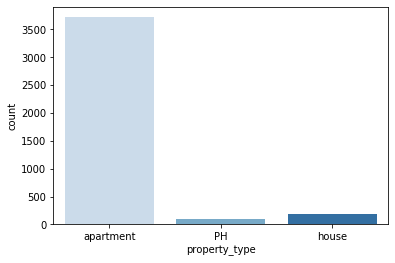

In [75]:
print(data_comuna['property_type'].value_counts())
sns.countplot(x='property_type', data=data_comuna, palette='Blues')

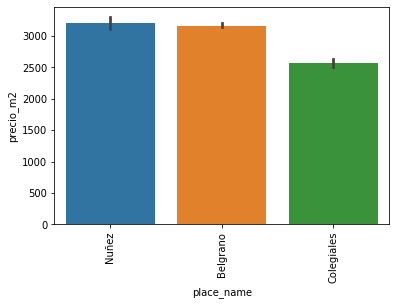

In [76]:
plt.xticks(rotation = 90)
barrios = data_comuna.groupby('place_name').mean().sort_values('precio_m2', ascending=False).index
sns.barplot(x='place_name', y='precio_m2', order=barrios, data=data_comuna);

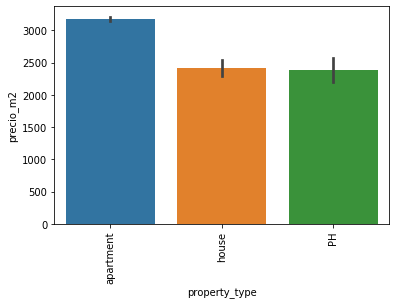

In [77]:
plt.xticks(rotation = 90)
barrios = data_comuna.groupby('property_type').mean().sort_values('precio_m2', ascending=False).index
sns.barplot(x='property_type', y='precio_m2', order=barrios, data=data_comuna);

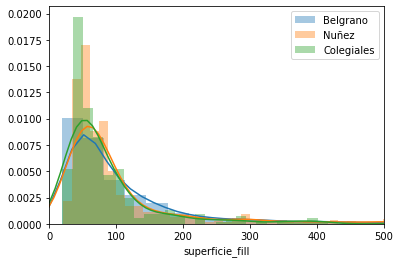

In [78]:
g = sns.distplot(data_comuna[data_comuna.place_name == 'Belgrano'].superficie_fill, label="Belgrano")
sns.distplot(data_comuna[data_comuna.place_name == 'Nuñez'].superficie_fill, label="Nuñez")
sns.distplot(data_comuna[data_comuna.place_name == 'Colegiales'].superficie_fill, label="Colegiales")
g.set_xlim(0, 500)
plt.legend()

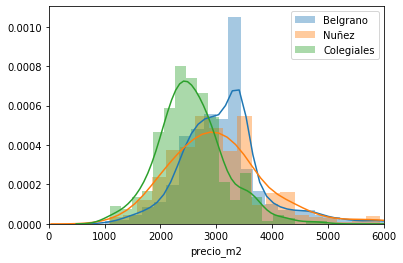

In [79]:
g = sns.distplot(data_comuna[data_comuna.place_name == 'Belgrano'].precio_m2, label="Belgrano")
sns.distplot(data_comuna[data_comuna.place_name == 'Nuñez'].precio_m2, label="Nuñez")
sns.distplot(data_comuna[data_comuna.place_name == 'Colegiales'].precio_m2, label="Colegiales")
g.set_xlim(0, 6000)
plt.legend()

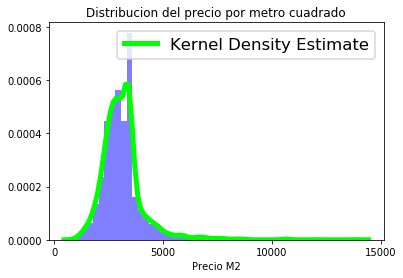

In [80]:
figure = plt.figure()

plt.title('Distribucion del precio por metro cuadrado', color = 'black')

sns.set_context('talk')
sns.distplot(data_comuna.precio_m2, axlabel = "Precio M2",\
            kde_kws={"color": "lime", "lw": 5, "label": "Kernel Density Estimate"},\
            hist_kws={"linewidth": 1, "alpha": 0.5, "color": "b"})

In [81]:
data_comuna["Ambientes"].isnull().sum()

1164

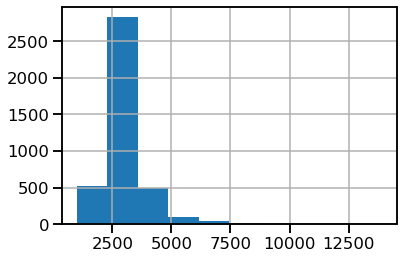

In [82]:

data_comuna.precio_m2.hist()

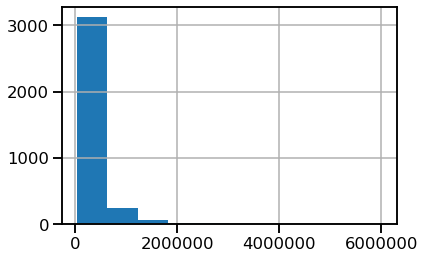

In [83]:
#Ahora armamos esto para ver cuanto cuesta la mayoria de las propiedades y saber donde filtrar precios que estan mal

data_comuna.price_aprox_usd.hist()    #la mayoria de las propiedades cuestan menos de 1 millon. Sacar las mayores a 1 millon

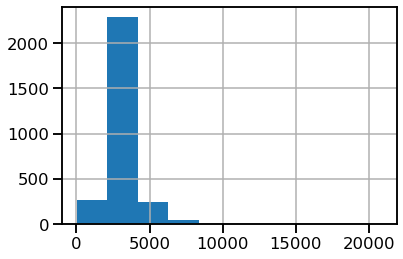

In [84]:
data_comuna.price_usd_per_m2.hist()    #Vemos que hasta 6k estan los m2 aprox

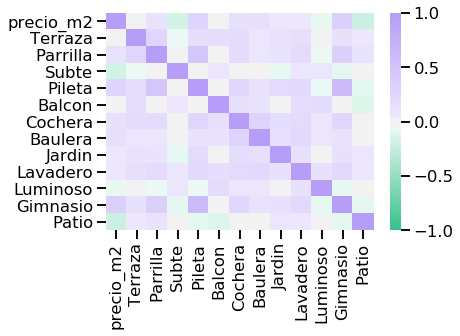

In [85]:
columnas_heatmap = ["precio_m2", 'Terraza','Parrilla', 'Subte', 'Pileta', 'Balcon', 'Cochera', 'Baulera', 'Jardin', 'Lavadero', 'Luminoso', 'Gimnasio', 'Patio']
data_heat = data_comuna.loc[:, columnas_heatmap]
Var_Corr = data_heat.corr()
cmap = sns.diverging_palette(150, 275, s=90, l=70, n=10, as_cmap=True)
grafi = sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, cmap=cmap, annot=False, vmin=-1, vmax=1 , cbar=True)
#grafi.figure.savefig('Corrr.png')
#las características mas correlacionadas al precio por metro cuadrado son pileta, gimnasio subte y patio (aunque el valor es negativo están correlacionadas igual)

In [86]:
media_precio_por_superficie = pd.concat([categorias_superficies, data_comuna.drop("superficie_fill", axis=1)], axis=1)
media_precio_por_superficie.head(4)  #precio promedio del m2 por categoria de superficie

,superficie_fill,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,precio_m2,Terraza,Subte,Parrilla,Pileta,Balcon,Cochera,Baulera,Jardin,Lavadero,Luminoso,Patio,Gimnasio,Habitaciones,Ambientes
7,"(38.0, 49.0]",7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,excelente monoambiente a estrenar amplio super...,jose hernandez 1400 monoambiente estrenar cat...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,3066.666667,False,False,False,True,False,False,False,False,True,True,False,False,NaN,NaN
8,"(60.0, 80.0]",8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,excelente dos ambientes estrenar amplio super...,"jose hernandez 1400 dos ambientes estrenar ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,3000.000000,False,False,False,True,False,False,False,False,True,True,False,False,NaN,NaN
120,"(49.0, 60.0]",120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",-34.562697,-58.460157,178000.0,USD,3140721.0,178000.0,NaN,55.0,NaN,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"depto de 3 amb. c/cochera cubierta, en piso 12...","departamento con plantas en mendoza 2700, capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...,3236.363636,False,True,False,False,True,True,False,False,True,True,False,False,NaN,NaN
210,"(49.0, 60.0]",210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",-34.562084,-58.456686,240000.0,USD,4234680.0,240000.0,57.0,54.0,4210.526316,4444.444444,NaN,2.0,NaN,http://www.properati.com.ar/15dic_venta_depart...,duplex con cochera fija cubierta 3 años de ant...,2 ambientes venta belgrano cochera cubierta,https://thumbs4.properati.com/4/5UHwVgdJWRAYH5...,4210.526316,True,True,True,False,True,True,False,False,False,True,False,False,1.0,2.0


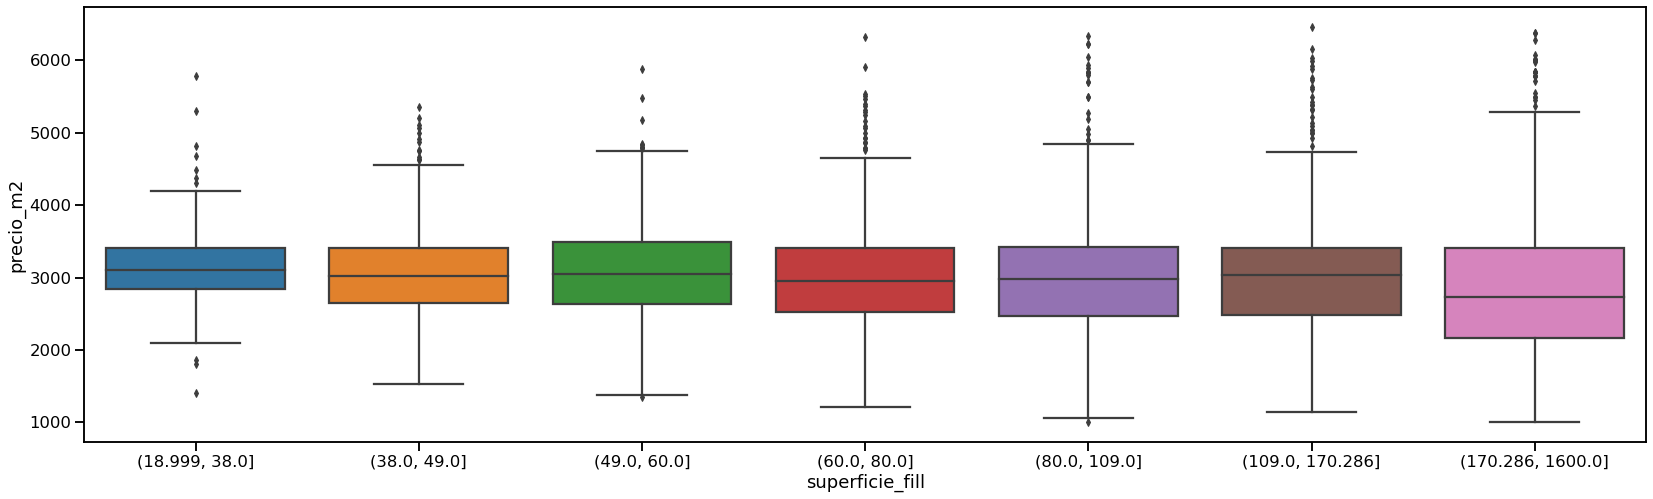

In [87]:
plt.figure(figsize=(28, 8))
ax = sns.boxplot(data=media_precio_por_superficie.query("precio_m2 < 6500"), y="precio_m2", x="superficie_fill")

In [88]:
#Para visualizar en un mapa nuestras propiedades
#Como primer paso, traemos el geojson de la pagina del gobierno de las calles de CABA
import geopandas as gpd
url='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/calles/callejero-ba.geojson'
calles=gpd.read_file(url)

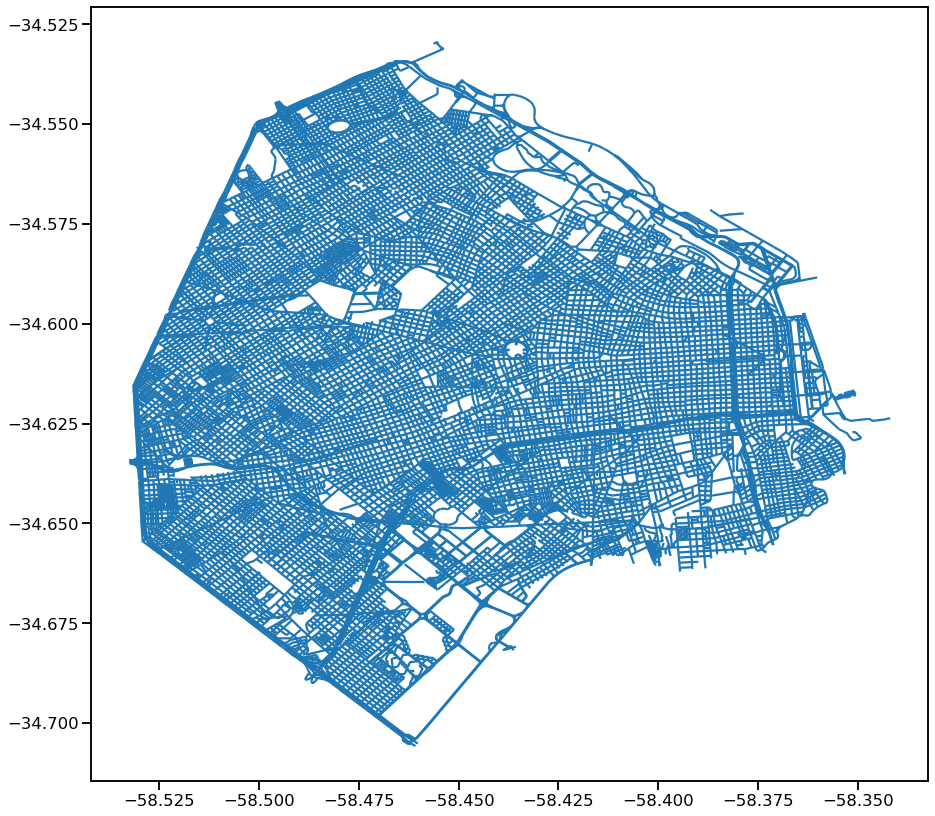

In [89]:
#Ploteamos el mapa
fig,ax=plt.subplots(figsize=(15,15))
calles.plot(ax=ax)

In [90]:
calles.head(3)

,id,codigo,nomoficial,alt_izqini,alt_izqfin,alt_derini,alt_derfin,nomanter,nom_mapa,tipo_c,long,sentido,cod_sent,observa,bicisenda,lado_ciclo,recorrid_x,ciclo_obse,tooltip_bi,red_jerarq,red_tp,ffcc,tipo_ffcc,COMUNA,COM_PAR,COM_IMPAR,BARRIO,BARRIO_PAR,BARRIO_IMP,geometry
0,28686,17138,PUNTA ARENAS,0,0,0,0,None,TÚNEL PUNTA ARENAS,TÚNEL,334.603417,DOBLE,2,Viaducto - Túnel inaugurado en Abril de 2009,-,None,None,None,None,VÍA DISTRIBUIDORA COMPLEMENTARIA,None,SI,Túnel,15,15,15,PATERNAL,PATERNAL,PATERNAL,"MULTILINESTRING ((-58.46940 -34.59082, -58.469..."
1,896,16003,"OBLIGADO RAFAEL, Av.Costanera",6182,6200,6181,6199,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,56.380000,DOBLE,2,None,Ciclovías,None,None,Construcción Año 2014,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,None,None,13,13,13,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.42922 -34.55085, -58.429..."
2,1724,16003,"OBLIGADO RAFAEL, Av.Costanera",4202,4500,4201,4499,"COSTANERA NORTE, Av.",AV.COSTANERA RAFAEL OBLIGADO,AVENIDA,297.260000,DOBLE,2,None,Ciclovías,None,None,Construcción Año 2014,Ciclovía,VÍA DISTRIBUIDORA PRINCIPAL,None,None,None,14,14,14,PALERMO,PALERMO,PALERMO,"MULTILINESTRING ((-58.41117 -34.55768, -58.412..."


In [91]:
#Como vimos que hay una columna que corresponde a la comuna, tomamos solo la comuna 13, y vemos que valores toma 
c13=calles.loc[calles.COMUNA==13,:]
c13.BARRIO.value_counts()

BELGRANO      964
NUÑEZ         622
COLEGIALES    346
PALERMO         1
Name: BARRIO, dtype: int64

In [92]:
c13.drop([1], inplace=True)

C:\Anaconda\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


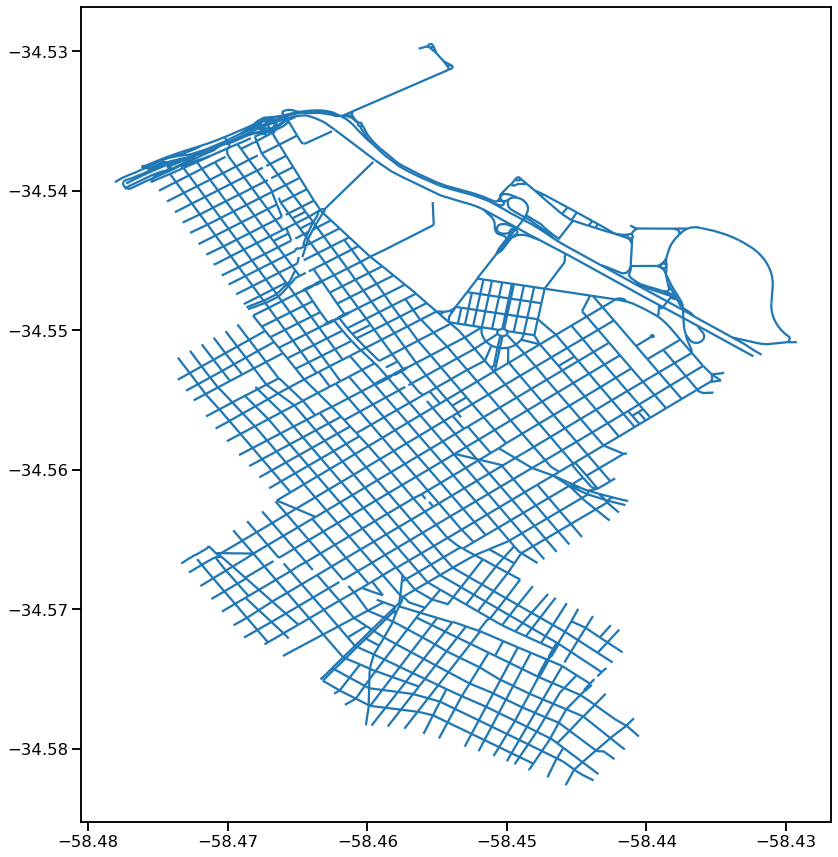

In [93]:
#Ploteamos solamente la comuna 13
fig,ax=plt.subplots(figsize=(15,15))
c13.plot(ax=ax)

In [94]:
#Creamos una columna con los datos Point (coordenadas geograficas de los puntos) usando la latitud y longitud de las propiedades en analisis
#Creamos un GeoDataFrame para poder graficarlo
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
geometry=[Point(xy) for xy in zip(data_comuna['lon'], data_comuna['lat'])]
#geometry[:3]
geo_df=gpd.GeoDataFrame(data_comuna,  geometry=geometry)
geo_df.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,superficie_fill,precio_m2,Terraza,Subte,Parrilla,Pileta,Balcon,Cochera,Baulera,Jardin,Lavadero,Luminoso,Patio,Gimnasio,Habitaciones,Ambientes,geometry
7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.0,138000.0,45.0,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,excelente monoambiente a estrenar amplio super...,jose hernandez 1400 monoambiente estrenar cat...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,45.0,3066.666667,False,False,False,True,False,False,False,False,True,True,False,False,NaN,NaN,POINT (-58.44336 -34.55987)
8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.5,195000.0,65.0,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,excelente dos ambientes estrenar amplio super...,"jose hernandez 1400 dos ambientes estrenar ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,65.0,3000.000000,False,False,False,True,False,False,False,False,True,True,False,False,NaN,NaN,POINT (-58.44336 -34.55987)
120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",-34.562697,-58.460157,178000.0,USD,3140721.0,178000.0,NaN,55.0,NaN,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"depto de 3 amb. c/cochera cubierta, en piso 12...","departamento con plantas en mendoza 2700, capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...,55.0,3236.363636,False,True,False,False,True,True,False,False,True,True,False,False,NaN,NaN,POINT (-58.46016 -34.56270)


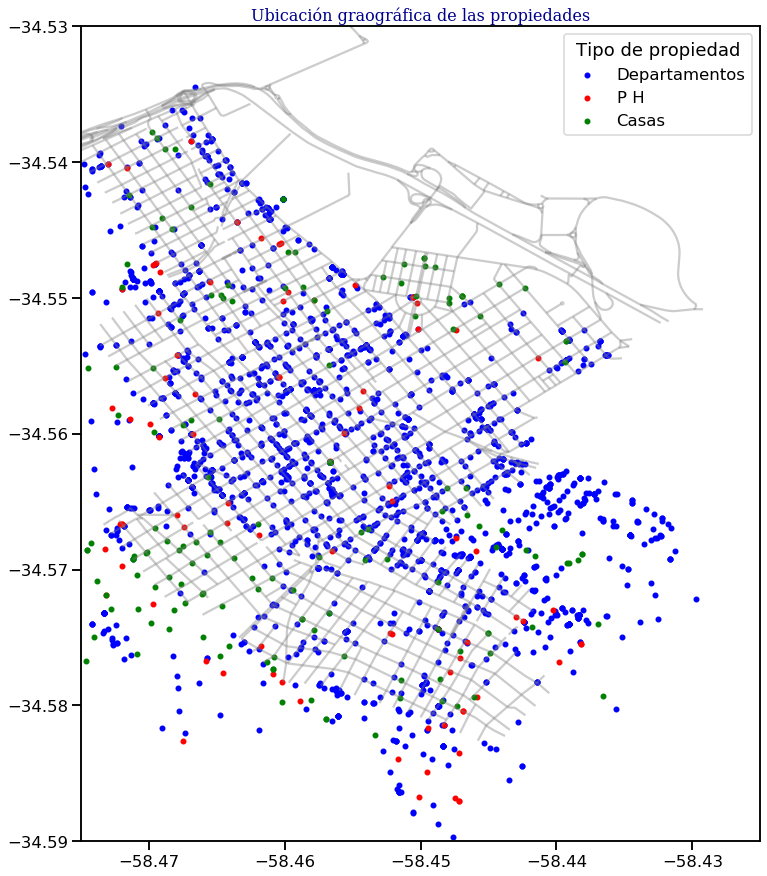

In [95]:
#Ploteamos las propiedades, separandolas por tipo de propiedad. Limitamos los ejes para quedarnos solo con los datos bien cargados.
fig,ax=plt.subplots(figsize=(15,15))
c13.plot(ax=ax, alpha=0.4, color='grey')
f=geo_df[geo_df.property_type=='apartment'].plot(ax=ax, markersize=20, color='blue', marker='o',label='Departamentos')
geo_df[geo_df.property_type=='PH'].plot(ax=ax, markersize=20, color='red', marker='o',label='P H')
geo_df[geo_df.property_type=='house'].plot(ax=ax, markersize=20, color='green', marker='o',label='Casas')

font={'family':'serif', 'color':'darkblue', 'weight':'normal','size':'16'}
plt.legend(loc='best', title='Tipo de propiedad', frameon=True)
f.set_xlim(-58.4750,-58.425)
f.set_ylim(-34.59,-34.53)
plt.title('Ubicación graográfica de las propiedades', fontdict=font)
plt.savefig('mapa.png')

In [96]:
#Traemos el geojson de las estaciones de subte de la pagina del gobierno
urlsubte='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/subte-estaciones/subte_estaciones.geojson'

In [97]:
subtes=gpd.read_file(urlsubte)
subtes.head(3)

,ID,ESTACION,LINEA,geometry
0,1.0,CASEROS,H,POINT (-58.39893 -34.63575)
1,2.0,INCLAN - MEZQUITA AL AHMAD,H,POINT (-58.40097 -34.62938)
2,3.0,HUMBERTO 1°,H,POINT (-58.40232 -34.62309)


In [98]:
#Nos quedamos solo con la linea D, que es la unica que pasa por la comuna 13
subtesD=subtes.loc[subtes.LINEA=='D',:]
subtesD.reset_index(drop=True,inplace=True)
subtesD
subtesD13=subtesD[10:16]  #Viendo lo resultante, me quedo con estas filas solamente, que son las estaciones que hay en la comuna 13
subtesD13.drop([14],inplace=True) #Dropeo Catedral, que esta erroneamente posicionada.

C:\Anaconda\envs\dhdsblend\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
subtesD13

,ID,ESTACION,LINEA,geometry
10,62.0,MINISTRO CARRANZA - MIGUEL ABUELO,D,POINT (-58.43501 -34.57518)
11,63.0,OLLEROS,D,POINT (-58.44467 -34.57001)
12,64.0,JOSE HERNANDEZ,D,POINT (-58.45213 -34.56622)
13,65.0,JURAMENTO,D,POINT (-58.45649 -34.56231)
15,71.0,CONGRESO DE TUCUMAN,D,POINT (-58.46238 -34.55564)


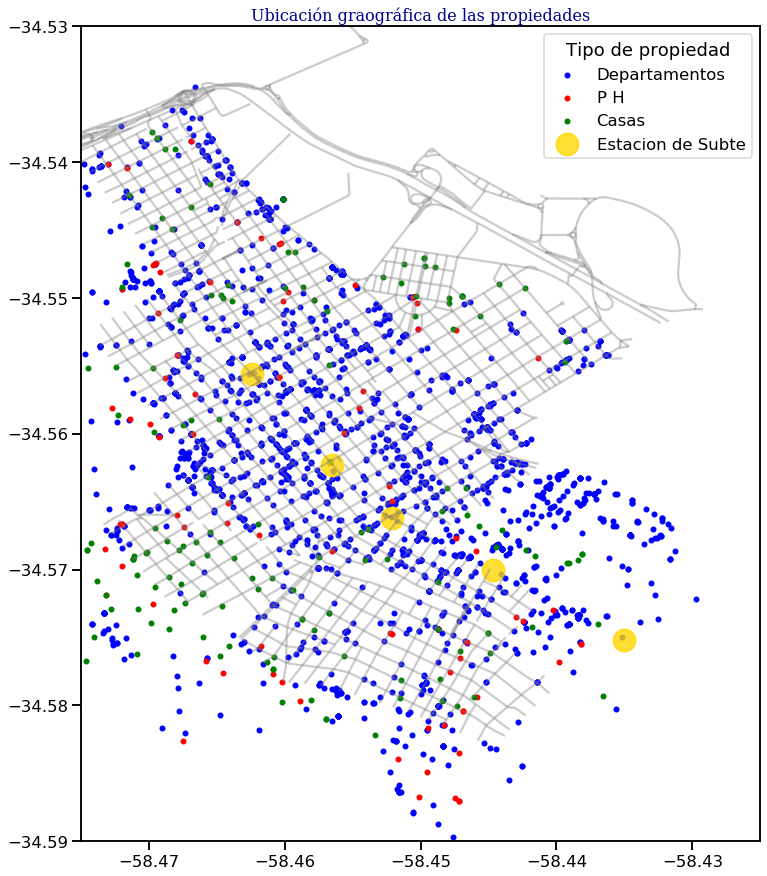

In [100]:
#Al mapa anterior le agrego las estaciones de subte 
fig,ax=plt.subplots(figsize=(15,15))
c13.plot(ax=ax, alpha=0.4, color='grey')
f=geo_df[geo_df.property_type=='apartment'].plot(ax=ax, markersize=20, color='blue', marker='o',label='Departamentos')
geo_df[geo_df.property_type=='PH'].plot(ax=ax, markersize=20, color='red', marker='o',label='P H')
geo_df[geo_df.property_type=='house'].plot(ax=ax, markersize=20, color='green', marker='o',label='Casas')
subtesD13.plot(ax=ax, markersize=500, color='gold', marker='o',alpha=0.8, label='Estacion de Subte')

font={'family':'serif', 'color':'darkblue', 'weight':'normal','size':'16'}
plt.legend(loc='best', title='Tipo de propiedad', frameon=True)
f.set_xlim(-58.4750,-58.425)
f.set_ylim(-34.59,-34.53)
plt.title('Ubicación graográfica de las propiedades', fontdict=font)
plt.savefig('mapa.png')

In [101]:
data_comuna.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'superficie_fill', 'precio_m2', 'Terraza', 'Subte',
       'Parrilla', 'Pileta', 'Balcon', 'Cochera', 'Baulera', 'Jardin',
       'Lavadero', 'Luminoso', 'Patio', 'Gimnasio', 'Habitaciones',
       'Ambientes', 'geometry'],
      dtype='object')

In [102]:
#Nos quedamos con las 20 propiedades con precio por m2 de cada tipo de inmueble.
geo_df_ap=geo_df.loc[geo_df.property_type=='apartment',:]
geo_df_ap_top=geo_df_ap.sort_values('precio_m2',ascending=True)[0:20]

geo_df_ph=geo_df.loc[geo_df.property_type=='PH',:]
geo_df_ph_top=geo_df_ph.sort_values('precio_m2',ascending=True)[0:20]

geo_df_house=geo_df.loc[geo_df.property_type=='house',:]
geo_df_house_top=geo_df_house.sort_values('precio_m2',ascending=True)[0:20]

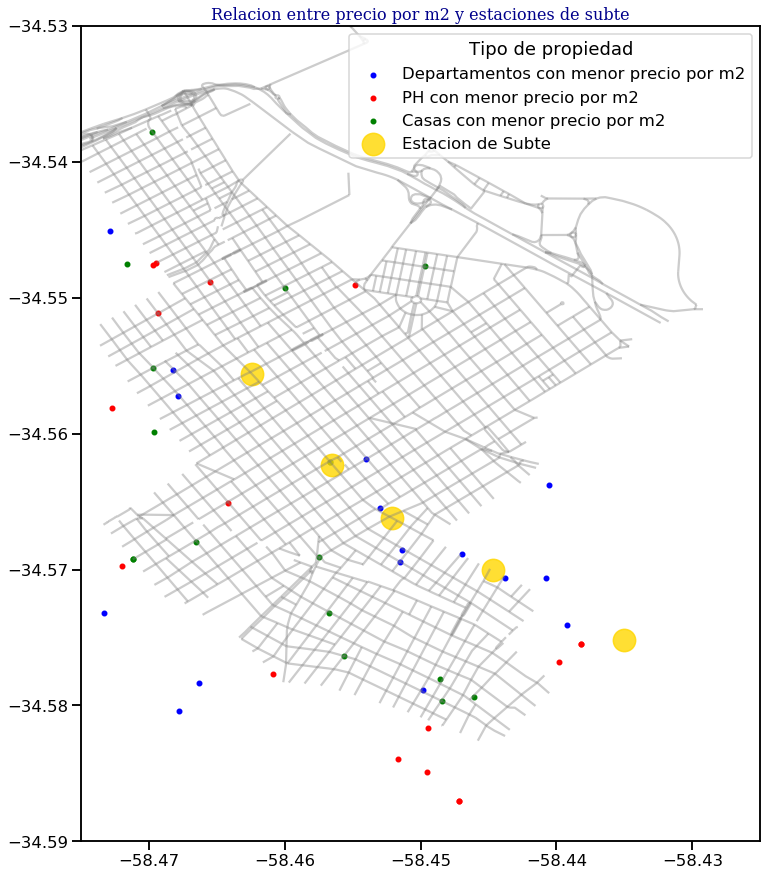

In [103]:
#Volvemos a graficar, pero esta vez limitandonos a los casos separados arriba
fig,ax=plt.subplots(figsize=(15,15))
c13.plot(ax=ax, alpha=0.4, color='grey')

g=geo_df_ap_top.plot(ax=ax, markersize=20, color='blue', marker='o',label='Departamentos con menor precio por m2')
geo_df_ph_top.plot(ax=ax, markersize=20, color='red', marker='o',label='PH con menor precio por m2')
geo_df_house_top.plot(ax=ax, markersize=20, color='green', marker='o',label='Casas con menor precio por m2')
subtesD13.plot(ax=ax, markersize=500, color='gold', marker='o',alpha=0.8, label='Estacion de Subte')

font={'family':'serif', 'color':'darkblue', 'weight':'normal','size':'16'}
plt.legend(loc='best', title='Tipo de propiedad', frameon=True)
g.set_xlim(-58.4750,-58.425)
g.set_ylim(-34.59,-34.53)
plt.title('Relacion entre precio por m2 y estaciones de subte', fontdict=font)
plt.savefig('subte.png')

In [104]:
#Queremos fijarnos la diferencia del precio por m2 con y sin cada palabra clave

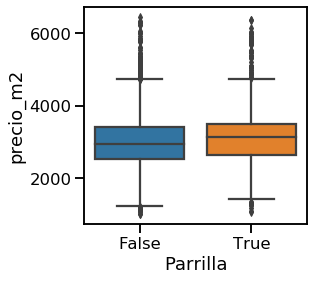

In [105]:
amenities = data_comuna.loc[:,["precio_m2", 'Terraza', 'Subte', 'Parrilla', 'Pileta', 'Balcon', 'Cochera', 'Baulera', 'Jardin', 'Lavadero', 'Luminoso', 'Gimnasio', 'Patio']]
plt.figure(figsize=(4, 4))
bp_parrilla = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Parrilla")

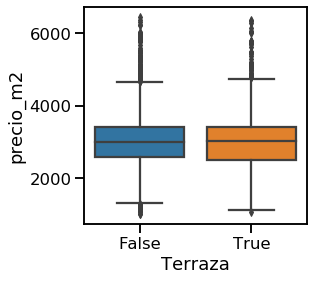

In [106]:
plt.figure(figsize=(4, 4))
bp_terraza = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Terraza")

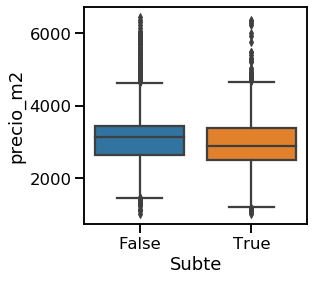

In [107]:
plt.figure(figsize=(4, 4))
bp_subte = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Subte")

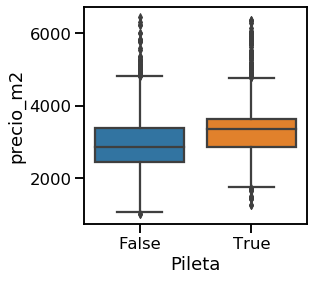

In [108]:
plt.figure(figsize=(4, 4))
bp_pileta = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Pileta")

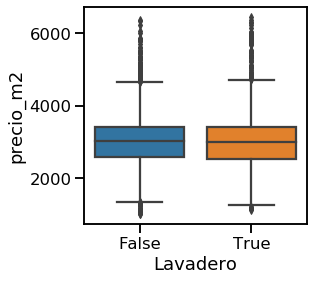

In [109]:
plt.figure(figsize=(4, 4))
bp_lavadero = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Lavadero")

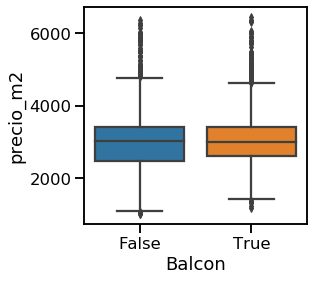

In [110]:
plt.figure(figsize=(4, 4))
bp_balcon = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Balcon")

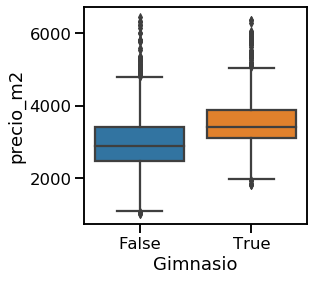

In [111]:
plt.figure(figsize=(4, 4))
bp_gimnasio = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Gimnasio")

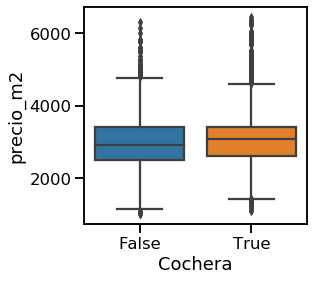

In [112]:
plt.figure(figsize=(4, 4))
bp_cochera = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Cochera")

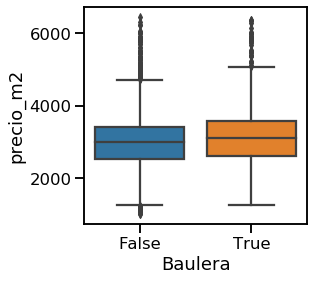

In [113]:
plt.figure(figsize=(4, 4))
bp_baulera = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Baulera")

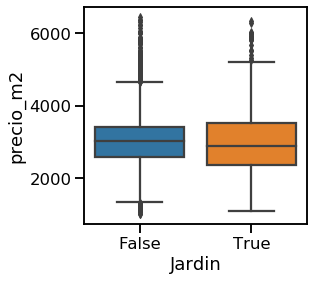

In [114]:
plt.figure(figsize=(4, 4))
bp_jardin = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Jardin")

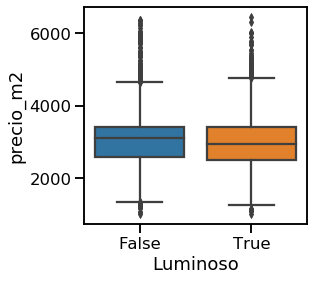

In [115]:
plt.figure(figsize=(4, 4))
bp_luminoso = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Luminoso")

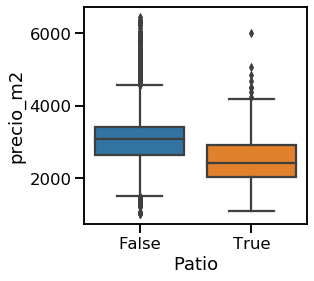

In [116]:
plt.figure(figsize=(4, 4))
bp_patio = sns.boxplot(data=amenities.query("precio_m2 < 6500"), y="precio_m2", x="Patio")

In [117]:
data_comuna.pivot_table(values='precio_m2', index=['place_name','property_type'], columns = 'Subte').round(0)

Subte                      False   True 
place_name property_type                
Belgrano   PH             2557.0  2491.0
           apartment      3414.0  3005.0
           house          2486.0  2561.0
Colegiales PH             2232.0  2227.0
           apartment      2645.0  2648.0
           house          2145.0  2211.0
Nuñez      PH             2417.0  2074.0
           apartment      3418.0  2979.0
           house          2285.0  2478.0

In [118]:
##Miramos la relacion entre el precio por metro cuadrado y la presencia de diferentes amenities, asi como
#tambien la diferencia de distribucion del precio por m2 dada la presencia de palabras clave y la ausencia de otra


In [119]:
amenities= data_comuna.loc[:,['precio_m2','Terraza','Subte','Parrilla','Pileta','Balcon','Cochera','Baulera','Jardin',
                                'Lavadero','Luminoso','Gimnasio','Patio']] #Armo un dataframe solo con precio_m2 y las amenities


In [120]:
#Proseguimos a reemplazar los valores True por la palabra clave para que quede mejor el grafico 

bp_terraza=amenities.Terraza.apply(lambda x: False if x is False else 'Terraza')
bp_subte=amenities.Subte.apply(lambda x: False if x is False else 'Subte')
bp_parrilla=amenities.Parrilla.apply(lambda x: False if x is False else 'Parrilla')
bp_pileta=amenities.Pileta.apply(lambda x: False if x is False else 'Pileta')
bp_balcon=amenities.Balcon.apply(lambda x: False if x is False else 'Balcon')
bp_cochera=amenities.Cochera.apply(lambda x: False if x is False else 'Cochera')
bp_baulera=amenities.Baulera.apply(lambda x: False if x is False else 'Baulera')
bp_jardin=amenities.Jardin.apply(lambda x: False if x is False else 'Jardin')
bp_lavadero=amenities.Lavadero.apply(lambda x: False if x is False else 'Lavadero')
bp_luminoso=amenities.Luminoso.apply(lambda x: False if x is False else 'Luminoso')
bp_gimnasio=amenities.Gimnasio.apply(lambda x: False if x is False else 'Gimnasio')
bp_patio=amenities.Patio.apply(lambda x: False if x is False else 'Patio')
namenities=pd.concat([amenities.precio_m2,bp_terraza,bp_subte,bp_parrilla,bp_pileta,bp_balcon,bp_cochera,bp_baulera,bp_jardin,
                     bp_lavadero,bp_luminoso,bp_gimnasio,bp_patio], axis=1, keys=['precio_m2','Terraza','Subte','Parrilla','Pileta','Balcon','Cochera','Baulera','Jardin',
                                'Lavadero','Luminoso','Gimnasio','Patio'])

In [121]:
#Vemos los porcentajes de propiedades que tienen las amenities, para decidir en cual enfocarnos. Optamos por Gimnasio, Pileta, Balcon, Cochera y Lavadero
print(namenities[namenities.Terraza=='Terraza'].Terraza.value_counts() / namenities.shape[0])
print(namenities[namenities.Subte=='Subte'].Subte.value_counts() / namenities.shape[0])
print(namenities[namenities.Parrilla=='Parrilla'].Parrilla.value_counts() / namenities.shape[0])
print(namenities[namenities.Pileta=='Pileta'].Pileta.value_counts() / namenities.shape[0])
print(namenities[namenities.Balcon=='Balcon'].Balcon.value_counts() / namenities.shape[0])
print(namenities[namenities.Cochera=='Cochera'].Cochera.value_counts() / namenities.shape[0])
print(namenities[namenities.Baulera=='Baulera'].Baulera.value_counts() / namenities.shape[0])
print(namenities[namenities.Jardin=='Jardin'].Jardin.value_counts() / namenities.shape[0])
print(namenities[namenities.Lavadero=='Lavadero'].Lavadero.value_counts() / namenities.shape[0])
print(namenities[namenities.Luminoso=='Luminoso'].Luminoso.value_counts() / namenities.shape[0])
print(namenities[namenities.Gimnasio=='Gimnasio'].Gimnasio.value_counts() / namenities.shape[0])
print(namenities[namenities.Patio=='Patio'].Patio.value_counts() / namenities.shape[0])

Terraza    0.330342
Name: Terraza, dtype: float64
Subte    0.460234
Name: Subte, dtype: float64
Parrilla    0.314136
Name: Parrilla, dtype: float64
Pileta    0.351284
Name: Pileta, dtype: float64
Balcon    0.55647
Name: Balcon, dtype: float64
Cochera    0.570182
Name: Cochera, dtype: float64
Baulera    0.213164
Name: Baulera, dtype: float64
Jardin    0.098479
Name: Jardin, dtype: float64
Lavadero    0.463974
Name: Lavadero, dtype: float64
Luminoso    0.446273
Name: Luminoso, dtype: float64
Gimnasio    0.209673
Name: Gimnasio, dtype: float64
Patio    0.105211
Name: Patio, dtype: float64


In [122]:
#Nos quedamos solo con las amenities seleccionadas y corregimos los indices 
bp_amenities=namenities.loc[:,['precio_m2','Gimnasio','Pileta','Balcon','Cochera','Lavadero']]
bp_amenities.reset_index(inplace=True)
bp_amenities.rename(columns={'index':'operacion'},inplace=True)
bp_amenities.head(3) 

,operacion,precio_m2,Gimnasio,Pileta,Balcon,Cochera,Lavadero
0,7,3066.666667,False,Pileta,False,False,Lavadero
1,8,3000.000000,False,Pileta,False,False,Lavadero
2,120,3236.363636,False,False,Balcon,Cochera,Lavadero


In [123]:
#Melteamos el dataframe para poder graficar
bp_amenities_m=pd.melt(bp_amenities, id_vars=['operacion', 'precio_m2'],value_vars=['Gimnasio','Pileta','Balcon','Cochera','Lavadero'])
bp_amenities_m

,operacion,precio_m2,variable,value
0,7,3066.666667,Gimnasio,False
1,8,3000.000000,Gimnasio,False
2,120,3236.363636,Gimnasio,False
3,210,4210.526316,Gimnasio,False
4,216,3437.500000,Gimnasio,False
...,...,...,...,...
20050,120198,2688.695652,Lavadero,False
20051,120199,2525.000000,Lavadero,False
20052,120918,2215.620000,Lavadero,Lavadero
20053,120968,3181.818182,Lavadero,Lavadero


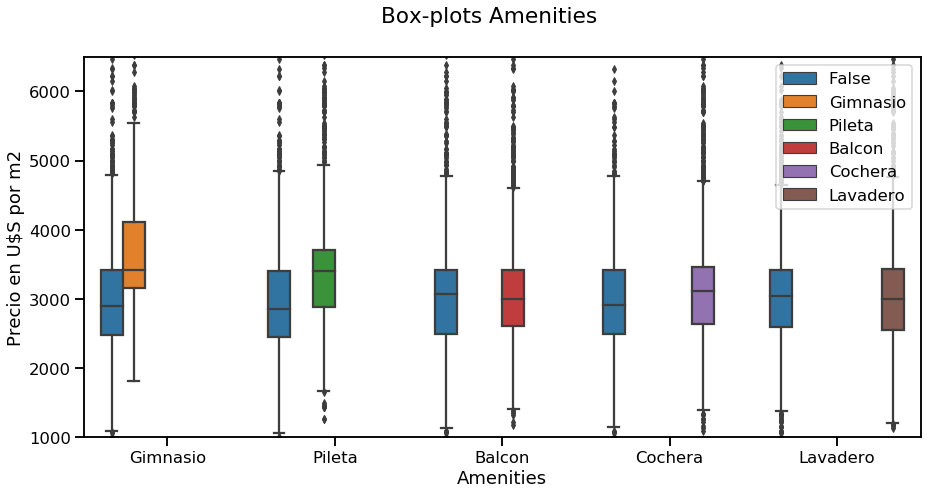

In [124]:
#Ploteamos 
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=bp_amenities_m, y="precio_m2", x="variable", hue="value")
plt.ylim(1000,6500)
plt.legend(loc='upper right')
plt.xlabel('Amenities')
plt.ylabel('Precio en U$S por m2')
plt.suptitle('Box-plots Amenities')
plt.savefig('boxplotsconjuntos')

In [125]:
#creamos la funcion para sacar la distancia en km entre dos puntos
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [126]:
#creamos un np con vacios y luego rellenamos cada np con su respectiva lat/lon. Luego lo insertamos a la funcion.
# y asi sucesivamente con todas las estaciones de subte y tren que se observan mas abajo
data_comuna['Subte_D_Congreso_lat'] = np.nan
data_comuna['Subte_D_Congreso_lat'] = data_comuna.Subte_D_Congreso_lat.fillna(value=-34.5571374)
data_comuna['Subte_D_Congreso_lon'] = np.nan
data_comuna['Subte_D_Congreso_lon'] = data_comuna.Subte_D_Congreso_lon.fillna(value=-58.4575053)
data_comuna['km_Sub_D_Cong']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Congreso_lon'],
                                 data_comuna['Subte_D_Congreso_lat'])
data_comuna['km_Sub_D_Cong'].head(10)

7      1.329566
8      1.329566
120    0.663716
210    0.554821
216    0.908634
219    1.704347
220    1.981511
221    1.981511
223    1.139488
229    0.766996
Name: km_Sub_D_Cong, dtype: float64

In [127]:
data_comuna['Subte_D_Juramento_lon'] = np.nan
data_comuna['Subte_D_Juramento_lon'] = data_comuna.Subte_D_Juramento_lon.fillna(value=-58.4587651)
data_comuna['Subte_D_Juramento_lat'] = np.nan
data_comuna['Subte_D_Juramento_lat'] = data_comuna.Subte_D_Juramento_lat.fillna(value=-34.5641916)
data_comuna['km_Sub_D_Jur']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Juramento_lon'],
                                 data_comuna['Subte_D_Juramento_lat'])
data_comuna['km_Sub_D_Jur'].head(10)

7      1.489041
8      1.489041
120    0.209322
210    0.301692
216    0.863948
219    1.561905
220    1.882692
221    1.882692
223    0.903761
229    0.189687
Name: km_Sub_D_Jur, dtype: float64

In [128]:
data_comuna['Subte_D_JHer_lat'] = np.nan
data_comuna['Subte_D_JHer_lat'] = data_comuna.Subte_D_JHer_lat.fillna(value=-34.564955)
data_comuna['Subte_D_JHer_lon'] = np.nan
data_comuna['Subte_D_JHer_lon'] = data_comuna.Subte_D_JHer_lon.fillna(value=-58.4568437)
data_comuna['km_Sub_D_JHer']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_JHer_lon'],
                                 data_comuna['Subte_D_JHer_lat'])

In [129]:
data_comuna['Subte_D_Carranza_lat'] = np.nan
data_comuna['Subte_D_Carranza_lat'] = data_comuna.Subte_D_Carranza_lat.fillna(value=-34.574965)
data_comuna['Subte_D_Carranza_lon'] = np.nan
data_comuna['Subte_D_Carranza_lon'] = data_comuna.Subte_D_Carranza_lon.fillna(value=-58.4388989)
data_comuna['km_Sub_D_Carranza']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Carranza_lon'],
                                 data_comuna['Subte_D_Carranza_lat'])

In [130]:
data_comuna['Subte_D_Palermo_lat'] = np.nan
data_comuna['Subte_D_Palermo_lat'] = data_comuna.Subte_D_Palermo_lat.fillna(value=-34.5788068)
data_comuna['Subte_D_Palermo_lon'] = np.nan
data_comuna['Subte_D_Palermo_lon'] = data_comuna.Subte_D_Palermo_lon.fillna(value=-58.4291623)
data_comuna['km_Sub_D_Palermo']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Palermo_lon'],
                                 data_comuna['Subte_D_Palermo_lat'])

In [131]:
data_comuna['Subte_D_PItalia_lat'] = np.nan
data_comuna['Subte_D_PItalia_lat'] = data_comuna.Subte_D_PItalia_lat.fillna(value=-34.582094)
data_comuna['Subte_D_PItalia_lon'] = np.nan
data_comuna['Subte_D_PItalia_lon'] = data_comuna.Subte_D_PItalia_lon.fillna(value=-58.4223377)
data_comuna['km_Sub_D_PItalia']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_PItalia_lon'],
                                 data_comuna['Subte_D_PItalia_lat'])

In [132]:
data_comuna['Subte_D_SOrtiz_lat'] = np.nan
data_comuna['Subte_D_SOrtiz_lat'] = data_comuna.Subte_D_SOrtiz_lat.fillna(value=-34.582094)
data_comuna['Subte_D_SOrtiz_lon'] = np.nan
data_comuna['Subte_D_SOrtiz_lon'] = data_comuna.Subte_D_SOrtiz_lon.fillna(value=-58.4223377)
data_comuna['km_Sub_D_SOrtiz']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_SOrtiz_lon'],
                                 data_comuna['Subte_D_SOrtiz_lat'])

In [133]:
data_comuna['Subte_D_Bulnes_lat'] = np.nan
data_comuna['Subte_D_Bulnes_lat'] = data_comuna.Subte_D_Bulnes_lat.fillna(value=-34.5876817)
data_comuna['Subte_D_Bulnes_lon'] = np.nan
data_comuna['Subte_D_Bulnes_lon'] = data_comuna.Subte_D_Bulnes_lon.fillna(value=-58.4153855)
data_comuna['km_Sub_D_Bulnes']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Subte_D_Bulnes_lon'],
                                 data_comuna['Subte_D_Bulnes_lat'])

In [134]:
data_comuna['Tren_M_Rivadavia_lat'] = np.nan
data_comuna['Tren_M_Rivadavia_lat'] = data_comuna.Tren_M_Rivadavia_lat.fillna(value=-34.5365208)
data_comuna['Tren_M_Rivadavia_lon'] = np.nan
data_comuna['Tren_M_Rivadavia_lon'] = data_comuna.Tren_M_Rivadavia_lon.fillna(value=-58.4732369)
data_comuna['km_Tren_M_Rvi']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_Rivadavia_lon'],
                                 data_comuna['Tren_M_Rivadavia_lat'])

In [135]:
data_comuna['Tren_M_Nuñez_lat'] = np.nan
data_comuna['Tren_M_Nuñez_lat'] = data_comuna.Tren_M_Nuñez_lat.fillna(value=-34.5490825)
data_comuna['Tren_M_Nuñez_lon'] = np.nan
data_comuna['Tren_M_Nuñez_lon'] = data_comuna.Tren_M_Nuñez_lon.fillna(value=-58.4674891)
data_comuna['km_Tren_M_Nuñez']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_Nuñez_lon'],
                                 data_comuna['Tren_M_Nuñez_lat'])

In [136]:
data_comuna['Tren_M_BelgranoC_lat'] = np.nan
data_comuna['Tren_M_BelgranoC_lat'] = data_comuna.Tren_M_BelgranoC_lat.fillna(value=-34.5596543)
data_comuna['Tren_M_BelgranoC_lon'] = np.nan
data_comuna['Tren_M_BelgranoC_lon'] = data_comuna.Tren_M_BelgranoC_lon.fillna(value=-58.4553967)
data_comuna['km_Tren_M_BelgranoC']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_BelgranoC_lon'],
                                 data_comuna['Tren_M_BelgranoC_lat'])

In [137]:
data_comuna['Tren_M_LisandroT_lat'] = np.nan
data_comuna['Tren_M_LisandroT_lat'] = data_comuna.Tren_M_LisandroT_lat.fillna(value=-34.5632232)
data_comuna['Tren_M_LisandroT_lon'] = np.nan
data_comuna['Tren_M_LisandroT_lon'] = data_comuna.Tren_M_LisandroT_lon.fillna(value=-58.4498167)
data_comuna['km_Tren_M_LisandroT']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_LisandroT_lon'],
                                 data_comuna['Tren_M_LisandroT_lat'])

In [138]:
data_comuna['Tren_M_Carranza_lat'] = np.nan
data_comuna['Tren_M_Carranza_lat'] = data_comuna.Tren_M_Carranza_lat.fillna(value=-34.5747182)
data_comuna['Tren_M_Carranza_lon'] = np.nan
data_comuna['Tren_M_Carranza_lon'] = data_comuna.Tren_M_Carranza_lon.fillna(value=-58.4474415)
data_comuna['Tren_M_Carranza']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_Carranza_lon'],
                                 data_comuna['Tren_M_Carranza_lat'])

In [139]:
data_comuna['Tren_M_Colegiales_lat'] = np.nan
data_comuna['Tren_M_Colegiales_lat'] = data_comuna.Tren_M_Colegiales_lat.fillna(value=-34.5747182)
data_comuna['Tren_M_Colegiales_lon'] = np.nan
data_comuna['Tren_M_Colegiales_lon'] = data_comuna.Tren_M_Colegiales_lon.fillna(value=-58.4474415)
data_comuna['Tren_M_Colegiales']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_Colegiales_lon'],
                                 data_comuna['Tren_M_Colegiales_lat'])

In [140]:
data_comuna['Tren_M_BelgranoR_lat'] = np.nan
data_comuna['Tren_M_BelgranoR_lat'] = data_comuna.Tren_M_BelgranoR_lat.fillna(value=-34.5747182)
data_comuna['Tren_M_BelgranoR_lon'] = np.nan
data_comuna['Tren_M_BelgranoR_lon'] = data_comuna.Tren_M_BelgranoR_lon.fillna(value=-58.4474415)
data_comuna['Tren_M_BelgranoR']= haversine_np(data_comuna['lon'],
                                 data_comuna['lat'],data_comuna['Tren_M_BelgranoR_lon'],
                                 data_comuna['Tren_M_BelgranoR_lat'])

In [141]:
data_comuna['Distancia_Tren'] =data_comuna.loc[:,["km_Tren_M_Rvi",
                                                   "km_Tren_M_Nuñez",
                                                   "km_Tren_M_BelgranoC","km_Tren_M_LisandroT",
                                                   "Tren_M_Carranza","Tren_M_Colegiales",
                                                   "Tren_M_BelgranoR"]].min(axis=1)

In [142]:
mask = data_comuna.Distancia_Tren > 2.5
mask.value_counts()
data_comuna.Distancia_Tren.loc[mask] = np.nan
data_comuna.Distancia_Tren.value_counts()

C:\Anaconda\envs\dhdsblend\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


0.294711    107
1.024658     51
0.973133     23
0.626519     21
0.123273     20
           ... 
0.858104      1
0.755810      1
0.198888      1
0.178244      1
0.618922      1
Name: Distancia_Tren, Length: 1665, dtype: int64

In [143]:
data_comuna.Distancia_Tren.describe()

count    2701.000000
mean        0.761665
std         0.428868
min         0.017587
25%         0.458196
50%         0.702910
75%         0.987595
max         2.493944
Name: Distancia_Tren, dtype: float64

In [144]:
data_comuna['Distancia_Subte'] =data_comuna.loc[:,["km_Sub_D_Cong",
                                                   "km_Sub_D_Jur","km_Sub_D_JHer",
                                                   "km_Sub_D_Carranza","km_Sub_D_Palermo",
                                                   "km_Sub_D_PItalia","km_Sub_D_SOrtiz",
                                                   "km_Sub_D_Bulnes"]].min(axis=1)

In [145]:
#Se hace una mascara booleana con los valores por encima de los 3km, debido a outliers(imposible estar mas de 30 cuadras  de distancia)
mask = data_comuna.Distancia_Subte > 2.5
mask.value_counts()
data_comuna.Distancia_Subte.loc[mask] = np.nan
data_comuna.Distancia_Subte.value_counts()

0.301692    107
0.550016     51
1.616923     23
1.295919     21
0.901615     20
           ... 
0.420453      1
2.188372      1
0.799675      1
1.130225      1
0.811120      1
Name: Distancia_Subte, Length: 1661, dtype: int64

In [146]:
data_comuna.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'superficie_fill', 'precio_m2', 'Terraza', 'Subte',
       'Parrilla', 'Pileta', 'Balcon', 'Cochera', 'Baulera', 'Jardin',
       'Lavadero', 'Luminoso', 'Patio', 'Gimnasio', 'Habitaciones',
       'Ambientes', 'geometry', 'Subte_D_Congreso_lat', 'Subte_D_Congreso_lon',
       'km_Sub_D_Cong', 'Subte_D_Juramento_lon', 'Subte_D_Juramento_lat',
       'km_Sub_D_Jur', 'Subte_D_JHer_lat', 'Subte_D_JHer_lon', 'km_Sub_D_JHer',
       'Subte_D_Carranza_lat', 'Subte_D_Carranza_lon', 'km_Sub_D_Carranza',
       'Subte_D_Palermo_lat', 'Subte_D_Palermo_lon'

In [147]:
drop_columns=data_comuna.loc[:,'Subte_D_Congreso_lat':'Tren_M_BelgranoR']
print(drop_columns.columns)
data_comuna = data_comuna.drop(drop_columns, axis=1) 
data_comuna.columns

Index(['Subte_D_Congreso_lat', 'Subte_D_Congreso_lon', 'km_Sub_D_Cong',
       'Subte_D_Juramento_lon', 'Subte_D_Juramento_lat', 'km_Sub_D_Jur',
       'Subte_D_JHer_lat', 'Subte_D_JHer_lon', 'km_Sub_D_JHer',
       'Subte_D_Carranza_lat', 'Subte_D_Carranza_lon', 'km_Sub_D_Carranza',
       'Subte_D_Palermo_lat', 'Subte_D_Palermo_lon', 'km_Sub_D_Palermo',
       'Subte_D_PItalia_lat', 'Subte_D_PItalia_lon', 'km_Sub_D_PItalia',
       'Subte_D_SOrtiz_lat', 'Subte_D_SOrtiz_lon', 'km_Sub_D_SOrtiz',
       'Subte_D_Bulnes_lat', 'Subte_D_Bulnes_lon', 'km_Sub_D_Bulnes',
       'Tren_M_Rivadavia_lat', 'Tren_M_Rivadavia_lon', 'km_Tren_M_Rvi',
       'Tren_M_Nuñez_lat', 'Tren_M_Nuñez_lon', 'km_Tren_M_Nuñez',
       'Tren_M_BelgranoC_lat', 'Tren_M_BelgranoC_lon', 'km_Tren_M_BelgranoC',
       'Tren_M_LisandroT_lat', 'Tren_M_LisandroT_lon', 'km_Tren_M_LisandroT',
       'Tren_M_Carranza_lat', 'Tren_M_Carranza_lon', 'Tren_M_Carranza',
       'Tren_M_Colegiales_lat', 'Tren_M_Colegiales_lon', 'Tren_

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail', 'superficie_fill', 'precio_m2', 'Terraza', 'Subte',
       'Parrilla', 'Pileta', 'Balcon', 'Cochera', 'Baulera', 'Jardin',
       'Lavadero', 'Luminoso', 'Patio', 'Gimnasio', 'Habitaciones',
       'Ambientes', 'geometry', 'Distancia_Tren', 'Distancia_Subte'],
      dtype='object')

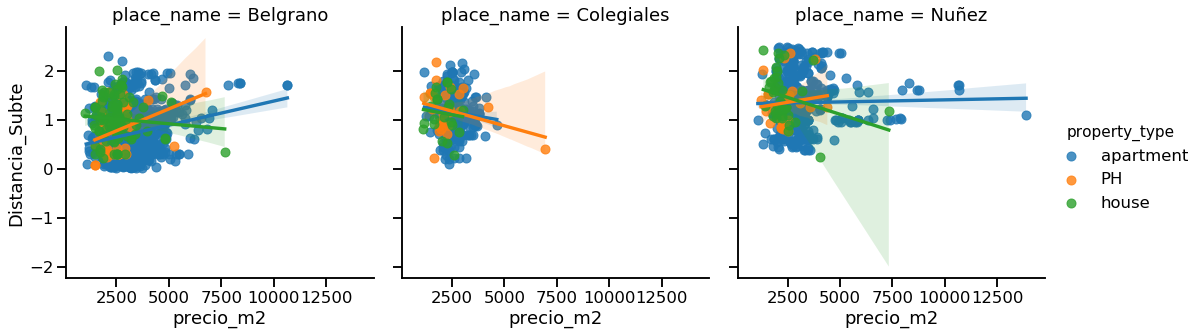

In [148]:
#Aqui se puede apreciar que el ajuste para belgrano parece ser mas significativo que para Colegiales y Nuñez(que directamente no tiene influencia)
sns_lmplot = sns.lmplot(x="precio_m2", y="Distancia_Subte", hue="property_type", col="place_name", data=data_comuna);
sns_lmplot.savefig("Subte.png")

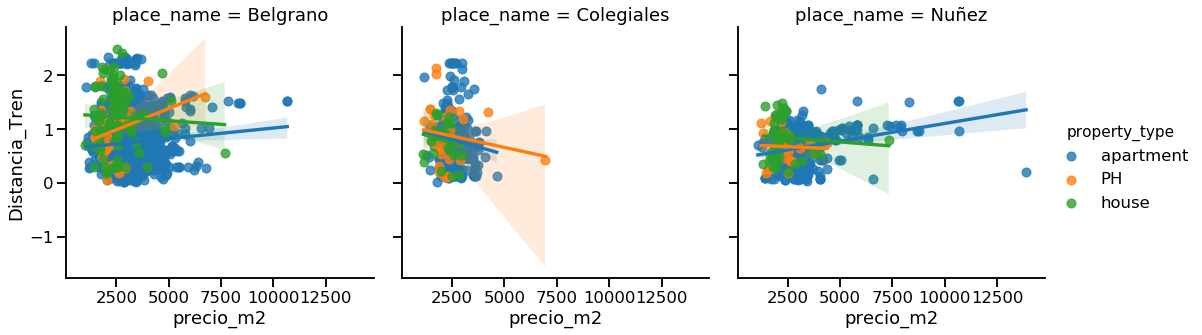

In [149]:
#intereseante en relacion positiva para Nuñez, pero negativa para el tipo house en todos los Barrios
#esto podria sugerir que por la contaminacion sonora la relacion con el tren es negativa, pero para los apartamentos
#no parece que lo afecte(puede ser personas jovenes que lo utilizan para trabajar)
sns_lmplot = sns.lmplot(x="precio_m2", y="Distancia_Tren", hue="property_type", col="place_name", data=data_comuna);
sns_lmplot.savefig("Tren.png")

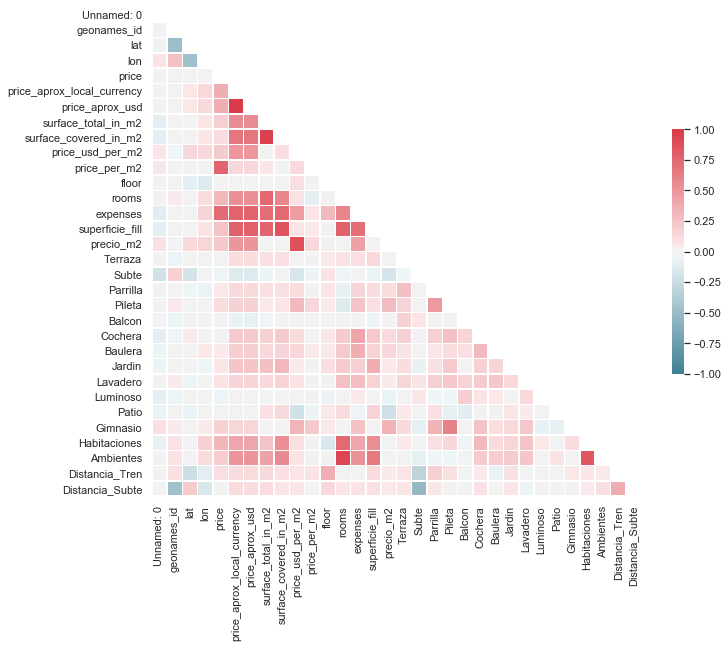

In [150]:
#Variante de grafico de correlaciones.
sns.set(style="white")

# Compute the correlation matrix
corr = data_comuna.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [152]:
%pwd

'C:\\Users\\Acer E15\\ds_blend_students_2020\\M2\\Proyecto\\Notebook'